## Visualizing distributions of data
* An early step in any effort to analyze or model data should be to understand how the variables are distributed. 
* Techniques for distribution visualization can provide quick answers to many important questions.
    * What range do the observations cover?
    * What is their central tendency?
    * Are they heavily skewed in one direction?
    * Is there evidence for bimodality?
    * Are there significant outliers?
      
Do the answers to these questions vary across subsets defined by other variables?

* The `distributions module` contains several functions designed to answer questions such as these.
* The axes-level functions are `histplot()`, `kdeplot()`, `ecdfplot()`, and `rugplot()`.
* They are grouped together within the figure-level `displot()`, `jointplot()`, and `pairplot()` functions.

####  Plotting univariate histograms

* The most common approach to visualizing a distribution is the histogram.
* This is the default approach in `displot()`, which uses the same underlying code as `histplot()`.
*  A histogram is a bar plot where the axis representing the data variable is divided into a set of discrete bins and the count of observations falling within each bin is shown using the height of the corresponding bar:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
penguins = pd.read_csv("Datasets/penguins.csv")
penguins.head(2)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE


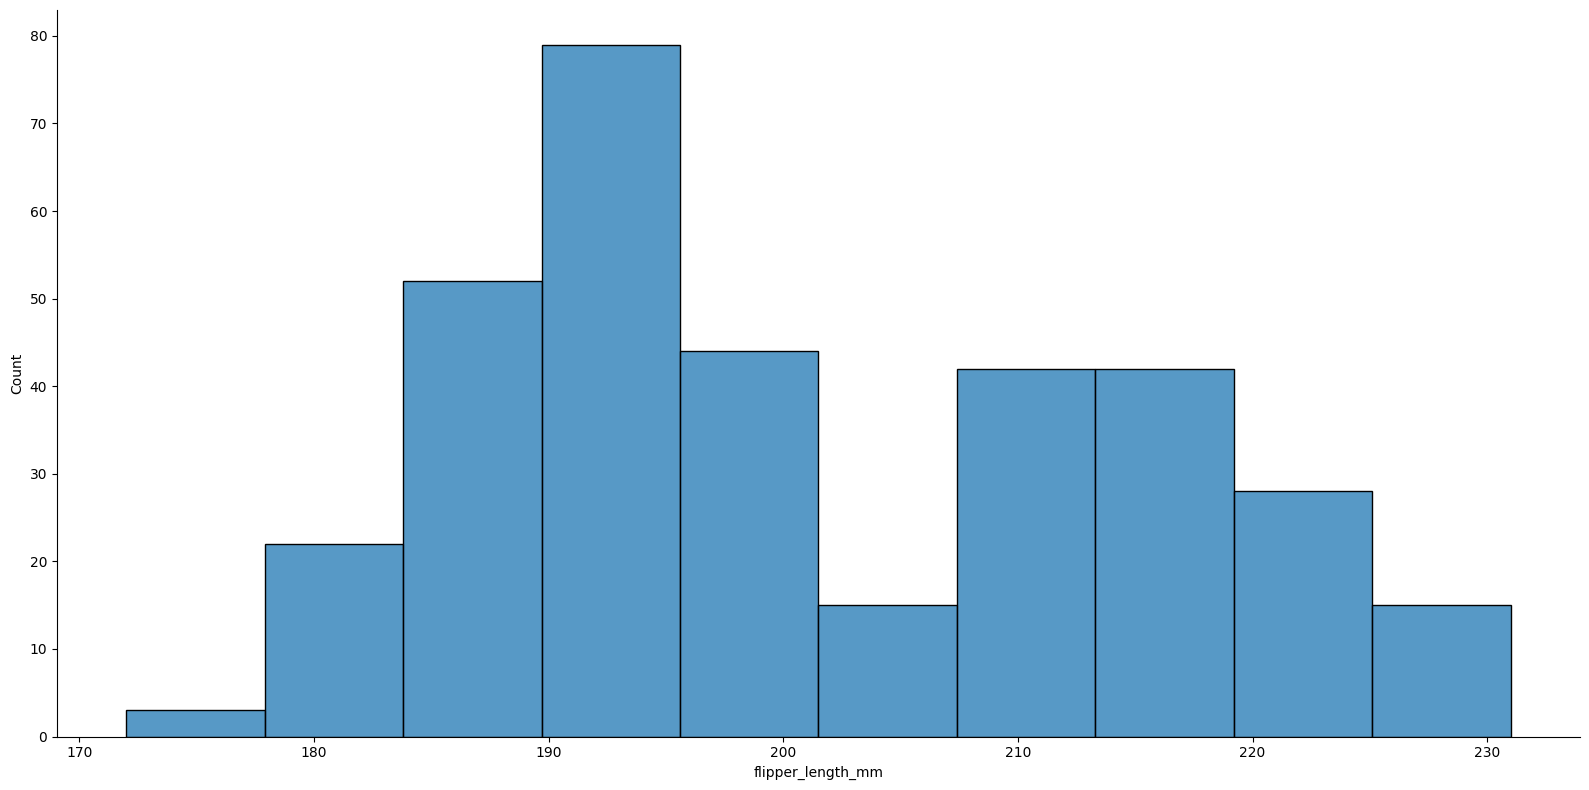

In [3]:
sns.displot(data=penguins,
           x = 'flipper_length_mm',
            height=8,aspect=2
           )

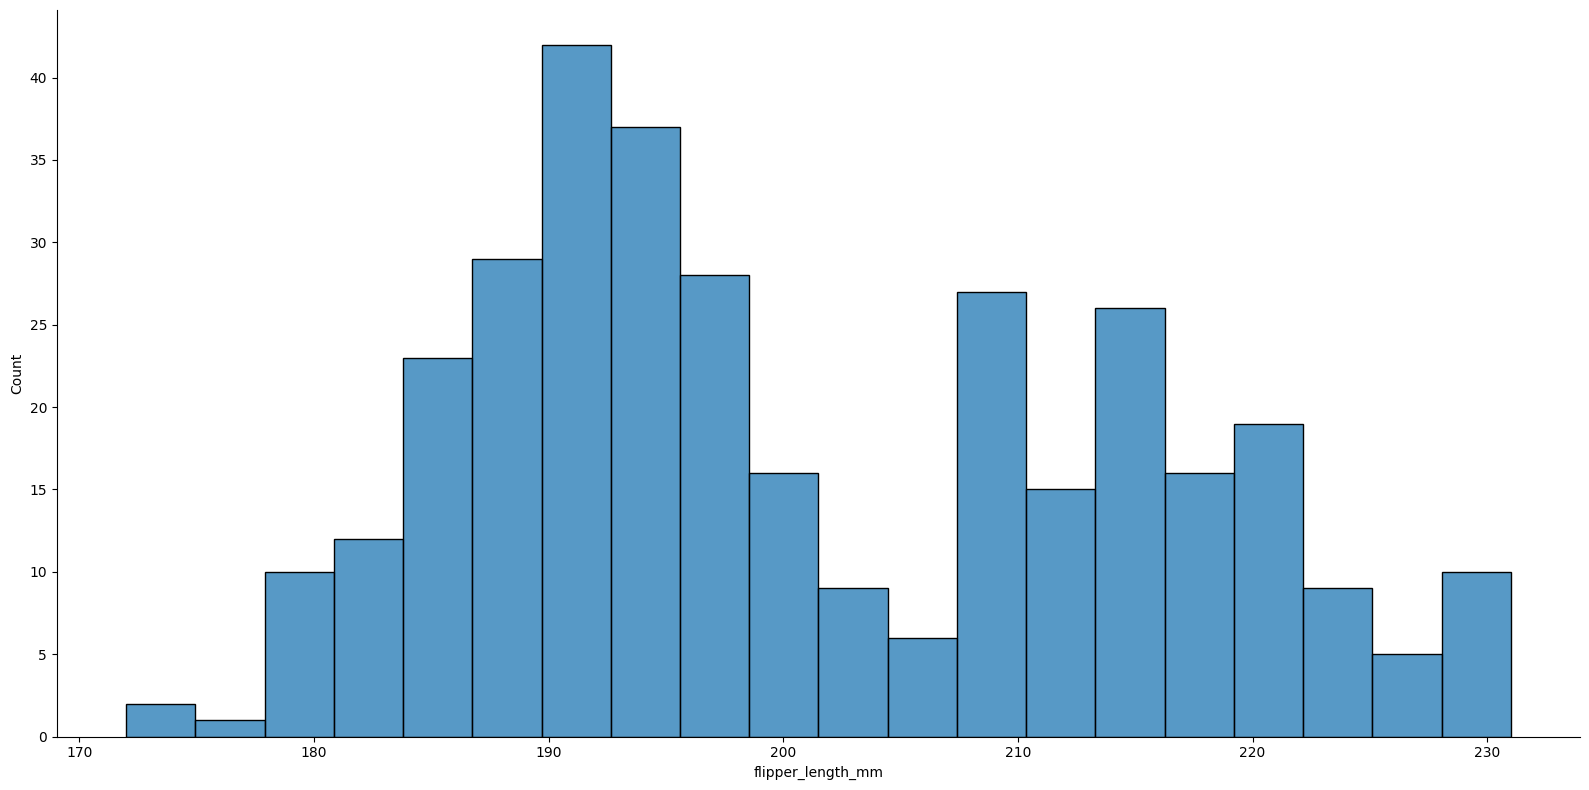

In [4]:
sns.displot(data=penguins,
           x = 'flipper_length_mm',
            height=8,
            aspect=2,
            binwidth=3,
           )

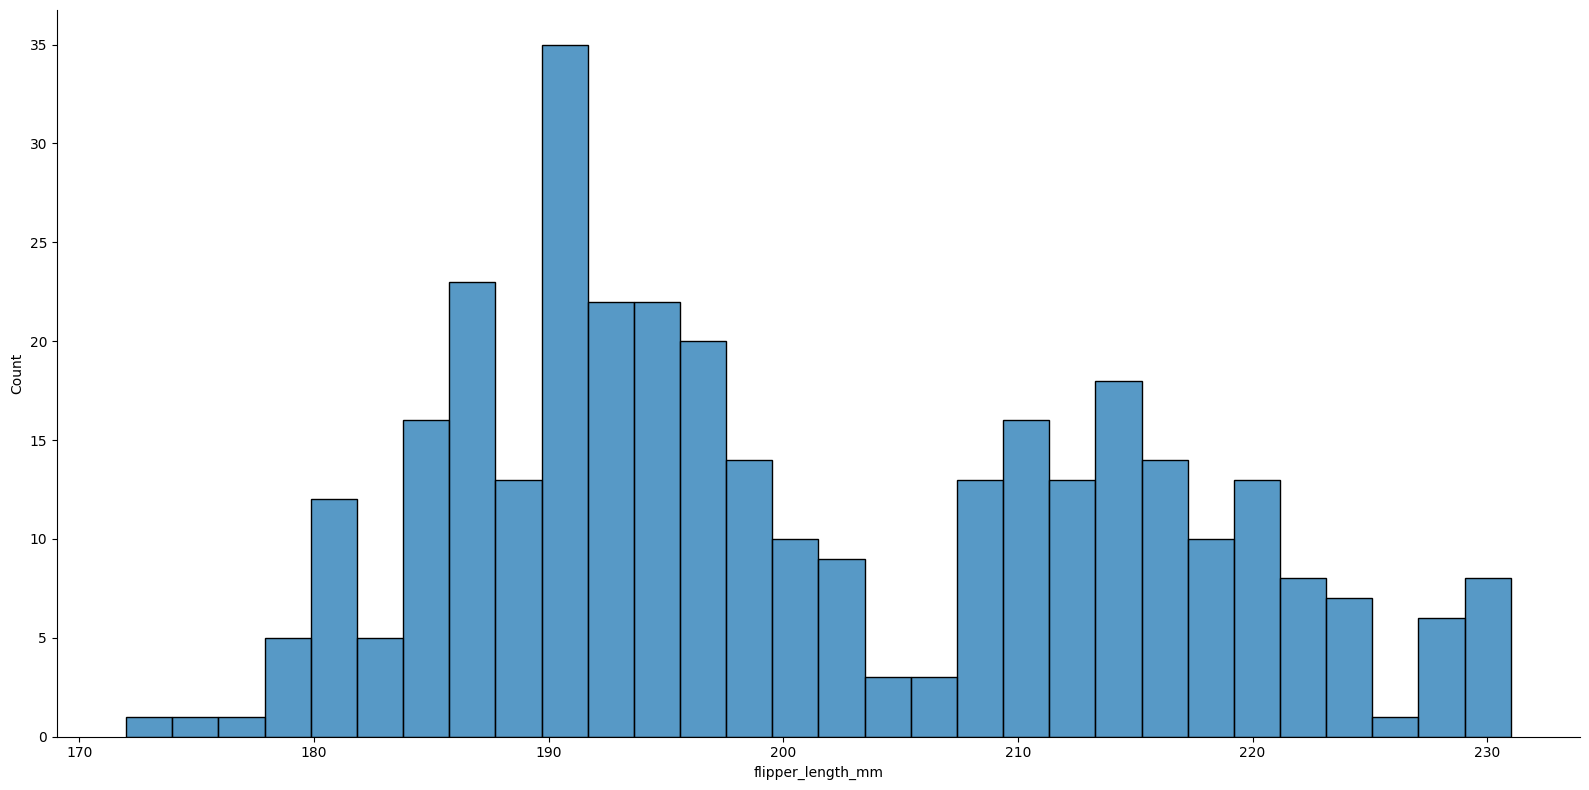

In [5]:
sns.displot(data=penguins,
           x = 'flipper_length_mm',
            height=8,aspect=2,
            bins=30
           )

In [6]:
tips = pd.read_csv("Datasets/tips.csv")
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


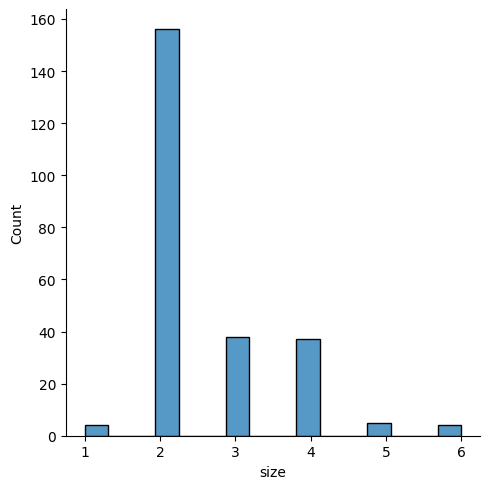

In [7]:
sns.displot(data=tips,x= 'size')

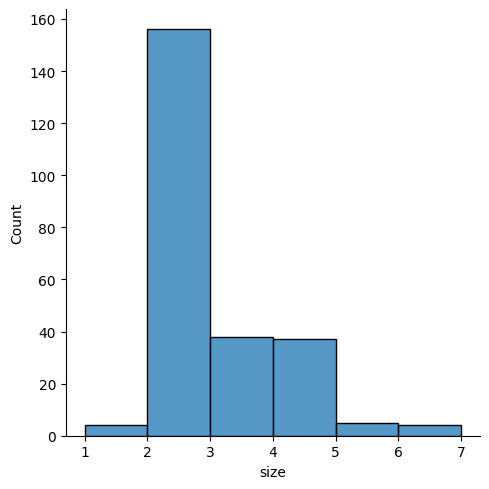

In [8]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

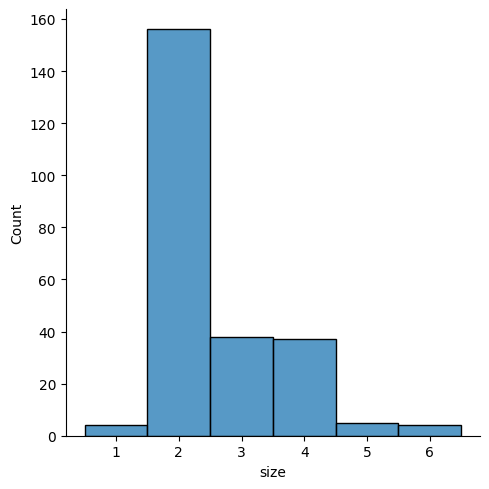

In [9]:
sns.displot(tips, x="size", discrete=True)

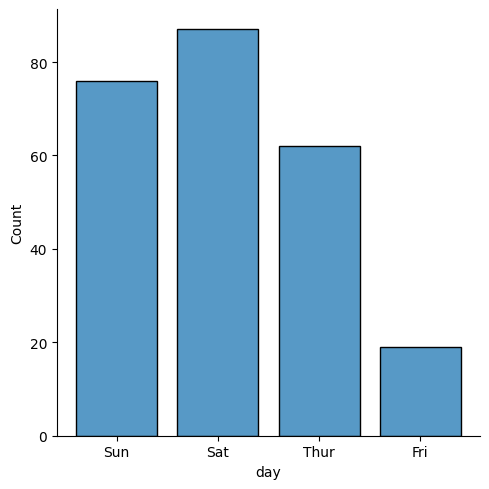

In [10]:
sns.displot(tips, x="day", shrink=.8)

#### Conditioning on other variables

* Once you understand the distribution of a variable, the next step is often to ask whether features of that distribution differ across other variables in the dataset.
* what accounts for the `bimodal` distribution of flipper lengths that we saw above?

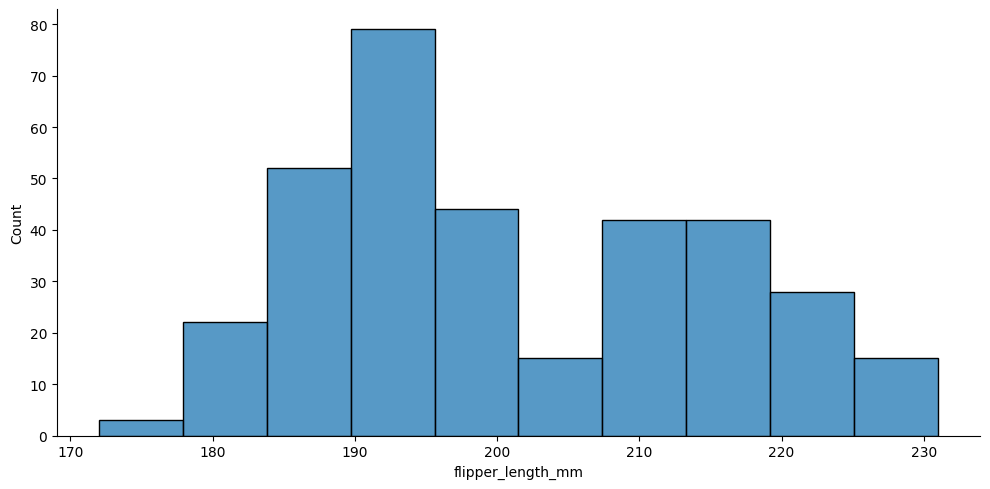

In [11]:
sns.displot(penguins, x="flipper_length_mm",
            height=5,
            aspect=2)

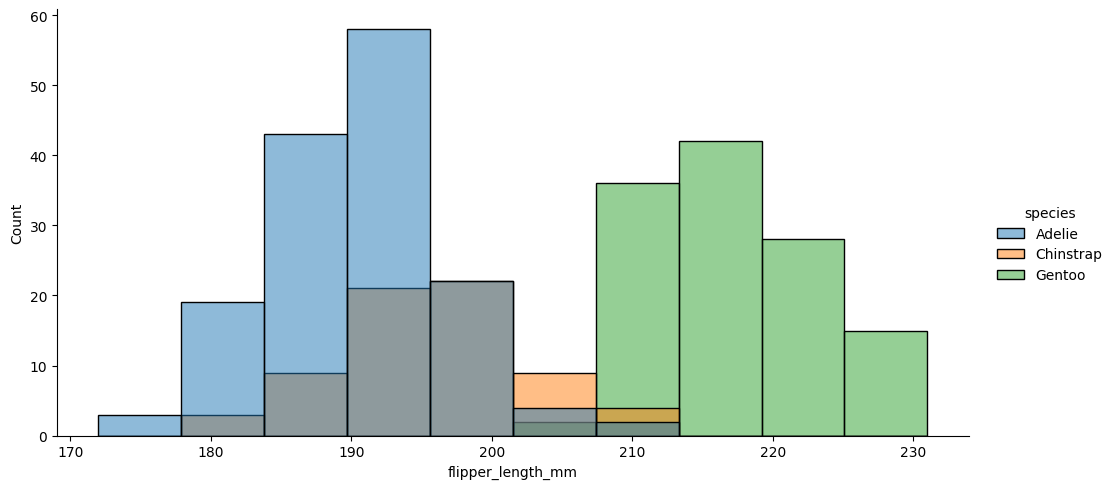

In [12]:
sns.displot(penguins, x="flipper_length_mm",
            height=5,
            aspect=2,
           hue='species'
           )

*  displot() and histplot() provide support for conditional subsetting via the `hue semantic`.
*  Assigning a variable to hue will draw a separate histogram for each of its unique values and distinguish them by color:

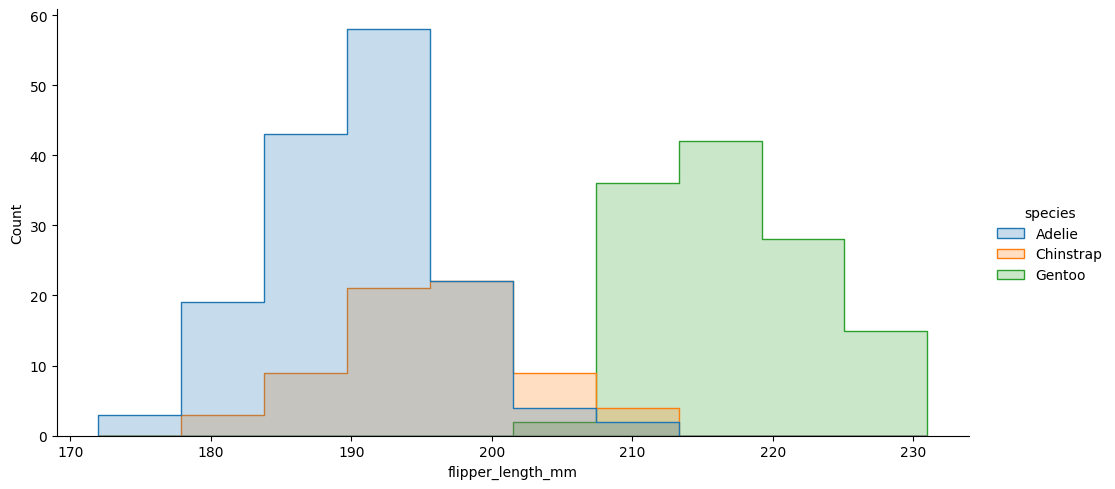

In [13]:
sns.displot(penguins, x="flipper_length_mm",
            height=5,
            aspect=2,
           hue='species',
            element='step'
           )

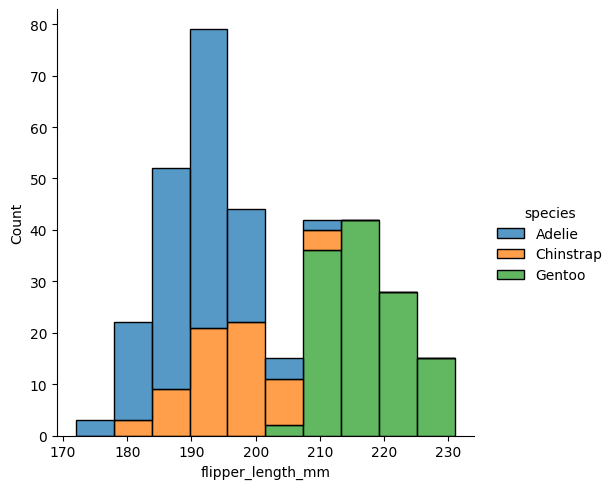

In [14]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

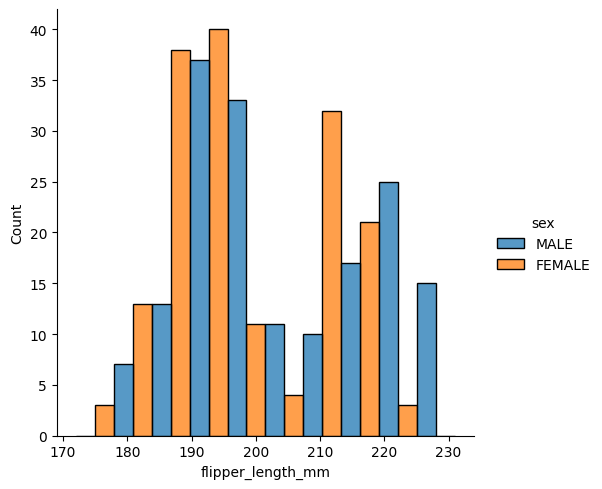

In [15]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

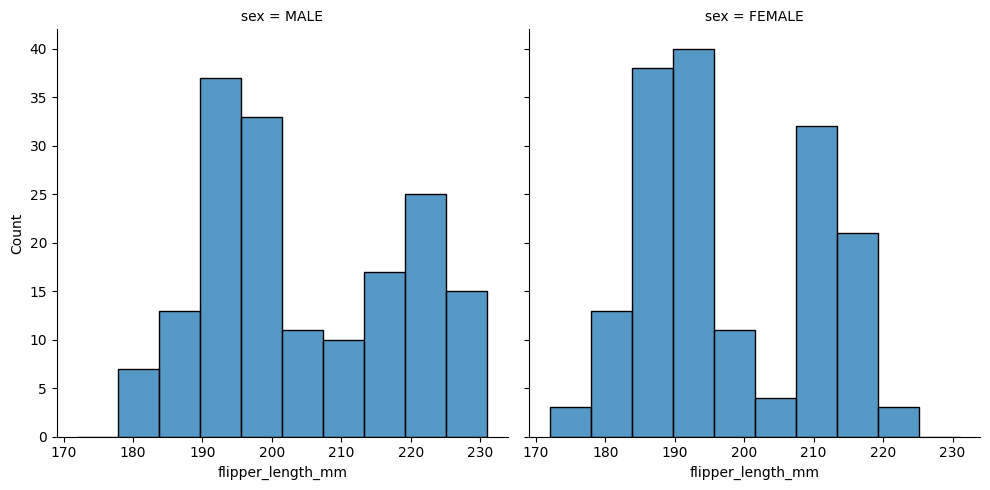

In [16]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

#### Normalized histogram statistics

* Before we do, another point to note is that, when the subsets have unequal numbers of observations, comparing their distributions in terms of counts may not be ideal.
* One solution is to normalize the counts using the `stat` parameter:

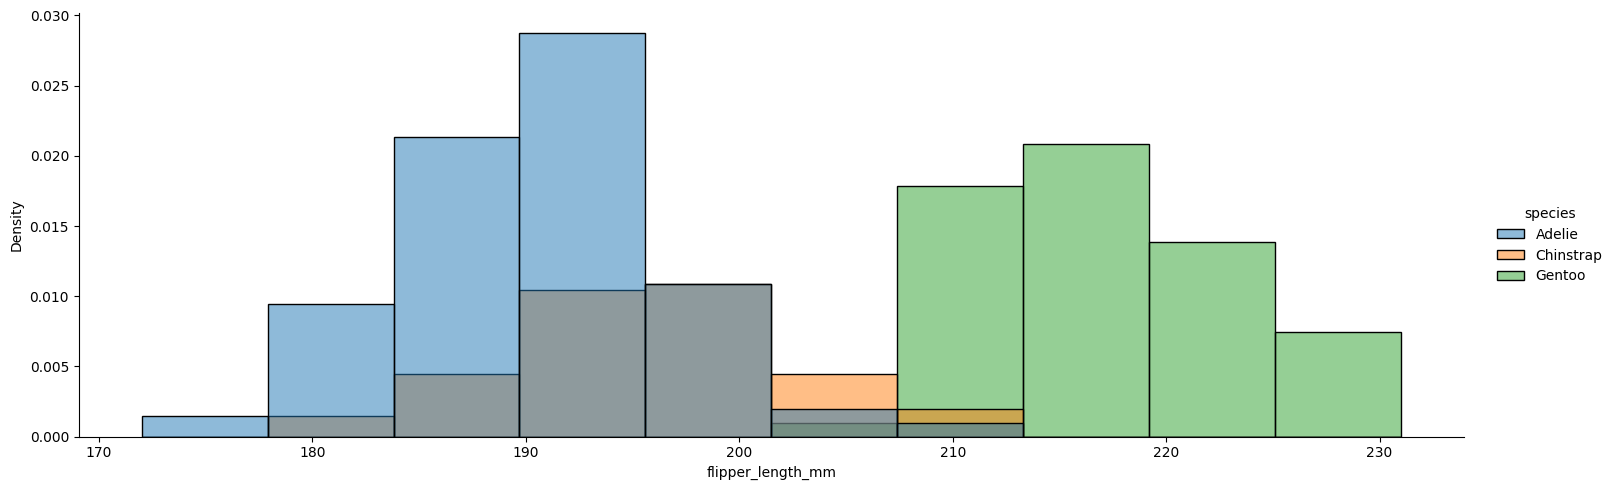

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density",aspect=3)

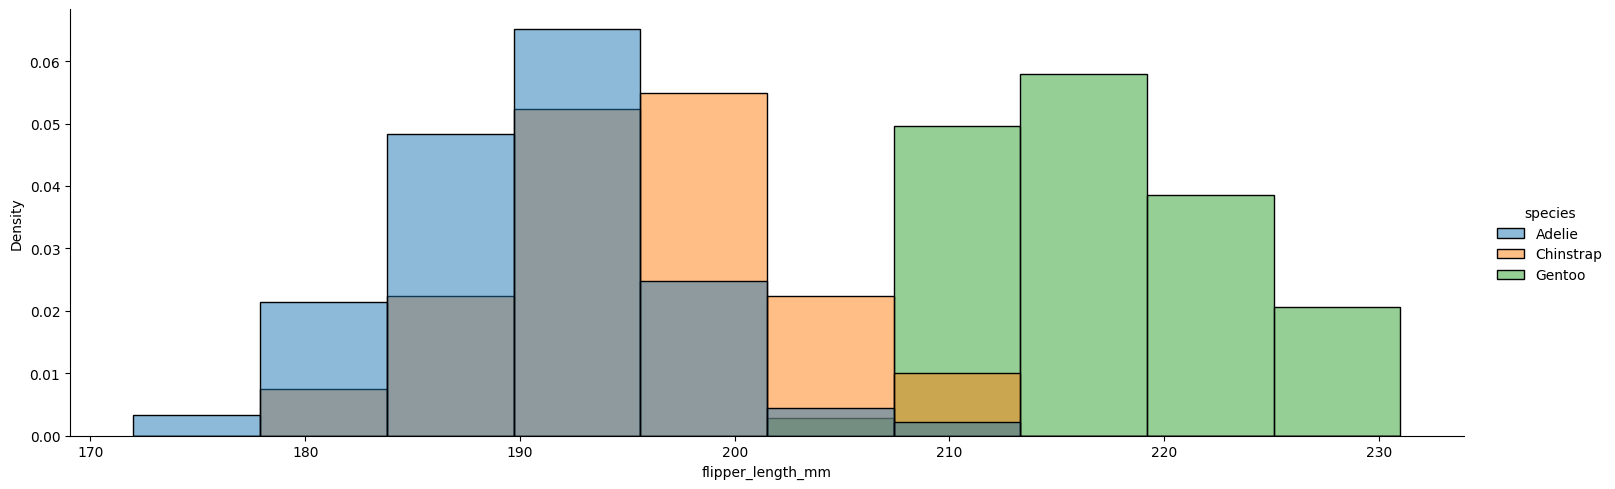

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density",aspect=3,common_norm=False) 

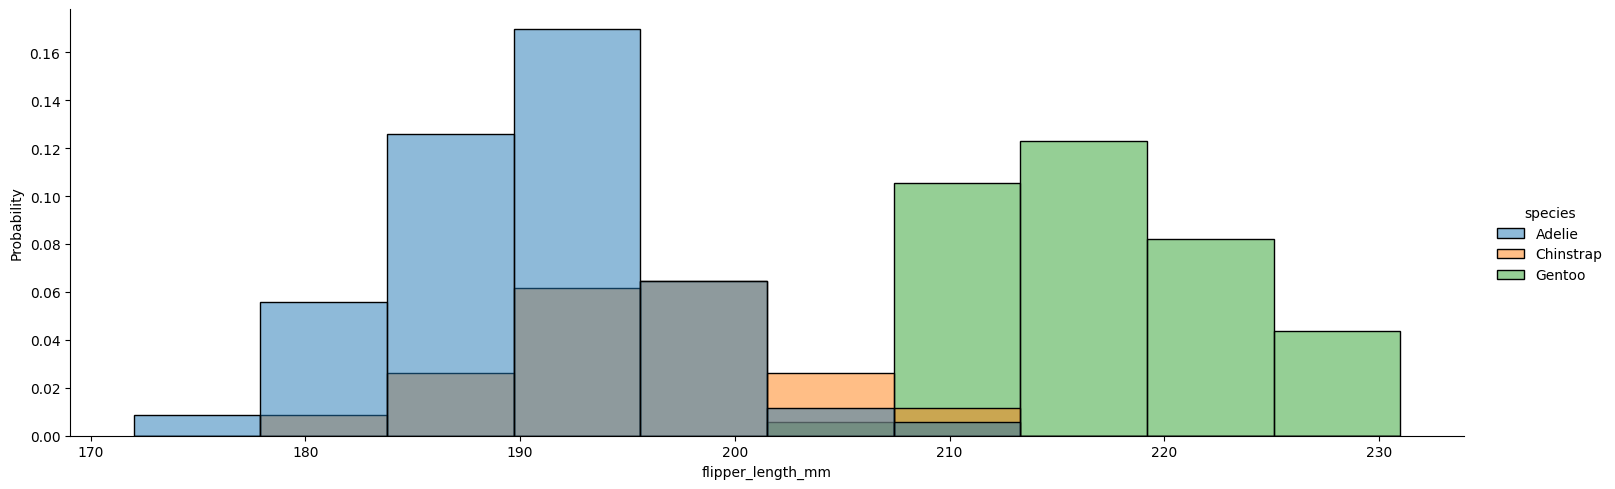

In [19]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability",aspect=3)

#### Kernel density estimation

* A histogram aims to approximate the underlying `probability density function` that generated the data by `binning` and `counting` observations.
* Kernel density estimation (KDE) presents a different solution to the same problem. Rather than using `discrete bins`, a KDE plot smooths the observations with a `Gaussian kernel`, producing a `continuous density estimate`:

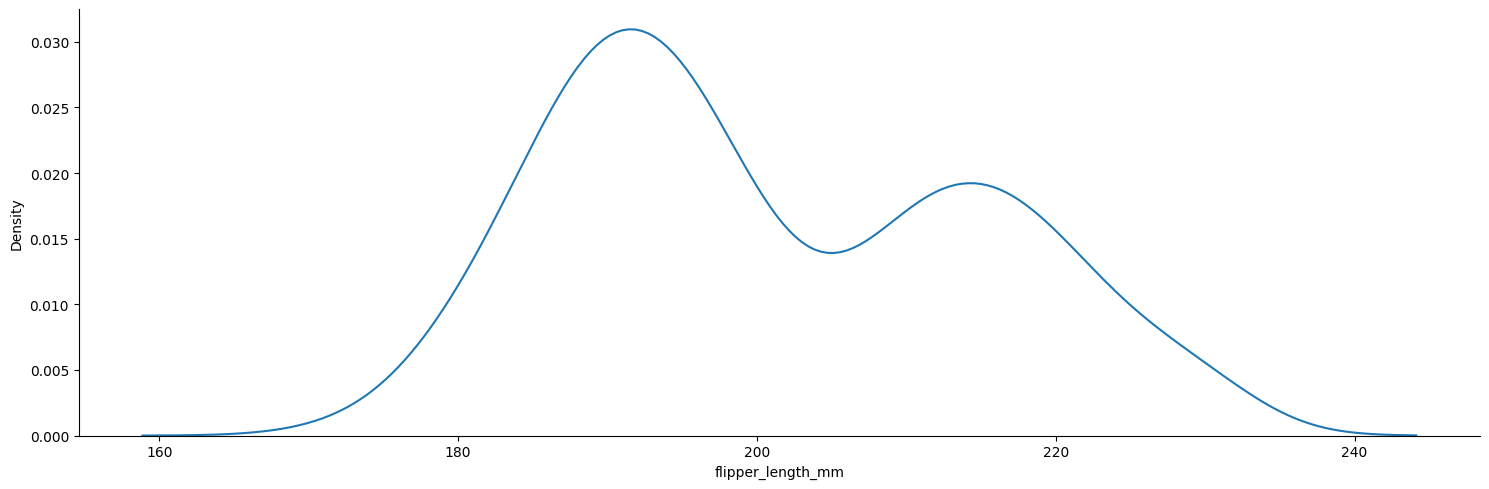

In [20]:
sns.displot(penguins, x="flipper_length_mm",aspect=3,kind='kde')

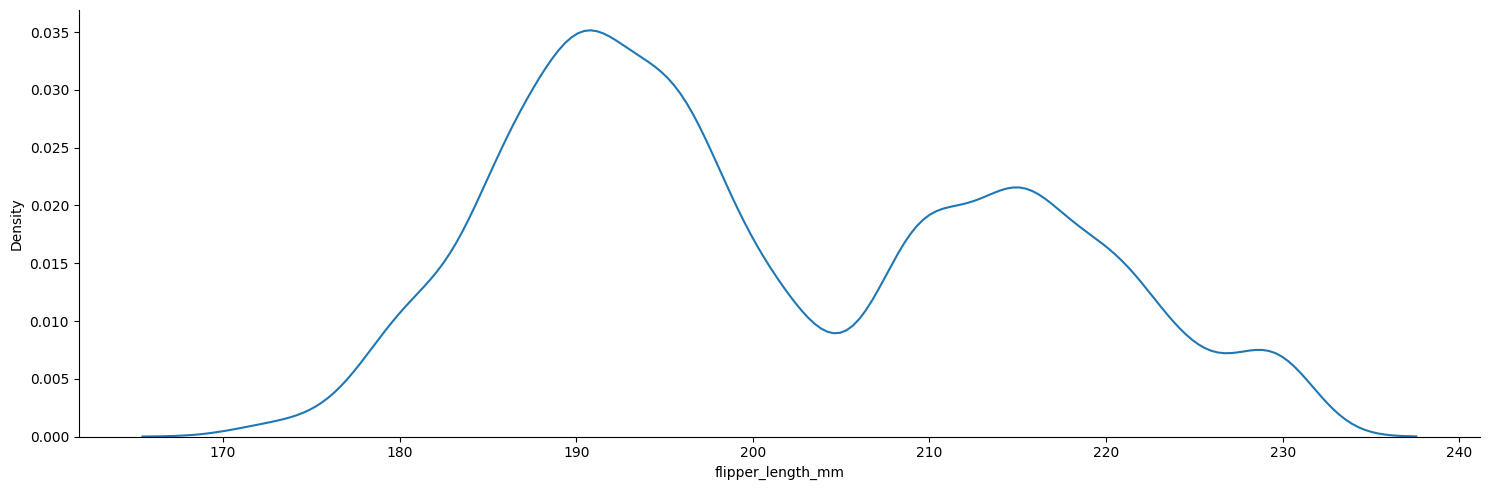

In [21]:
sns.displot(penguins, x="flipper_length_mm",aspect=3,kind='kde',bw_adjust=.5)

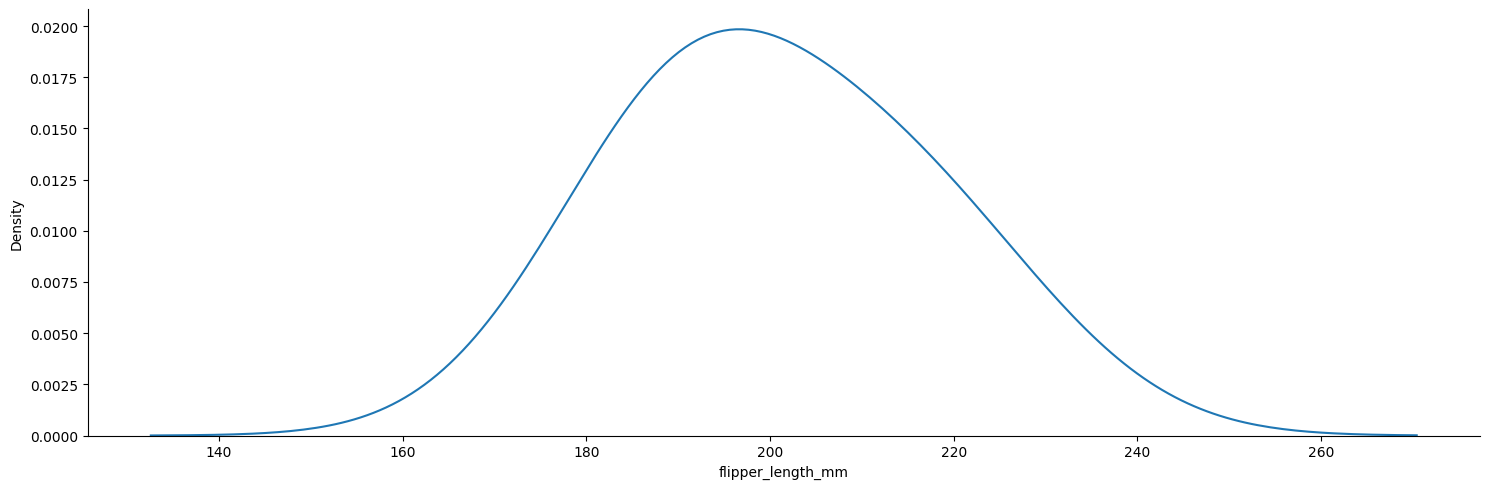

In [22]:
sns.displot(penguins, x="flipper_length_mm",aspect=3,kind='kde',bw_adjust=3)

##### Conditioning on other variables

* As with histograms, if you assign a `hue` variable, a separate density estimate will be computed for each level of that variable:

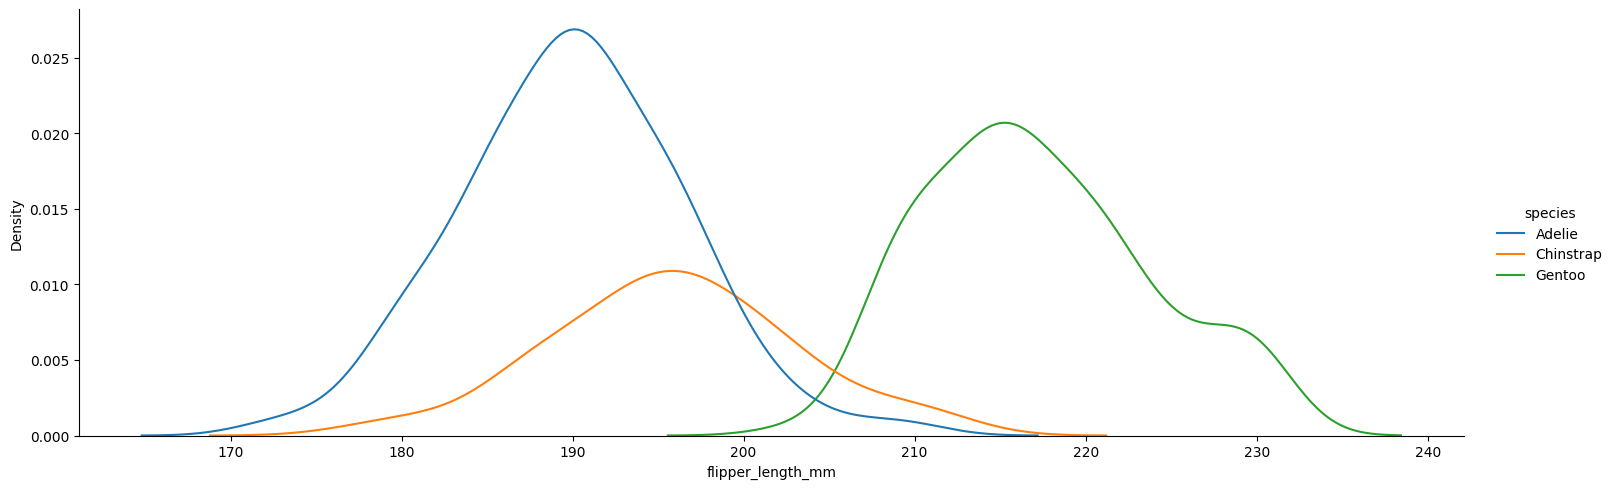

In [23]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde",aspect=3)#,bw_adjust=3)

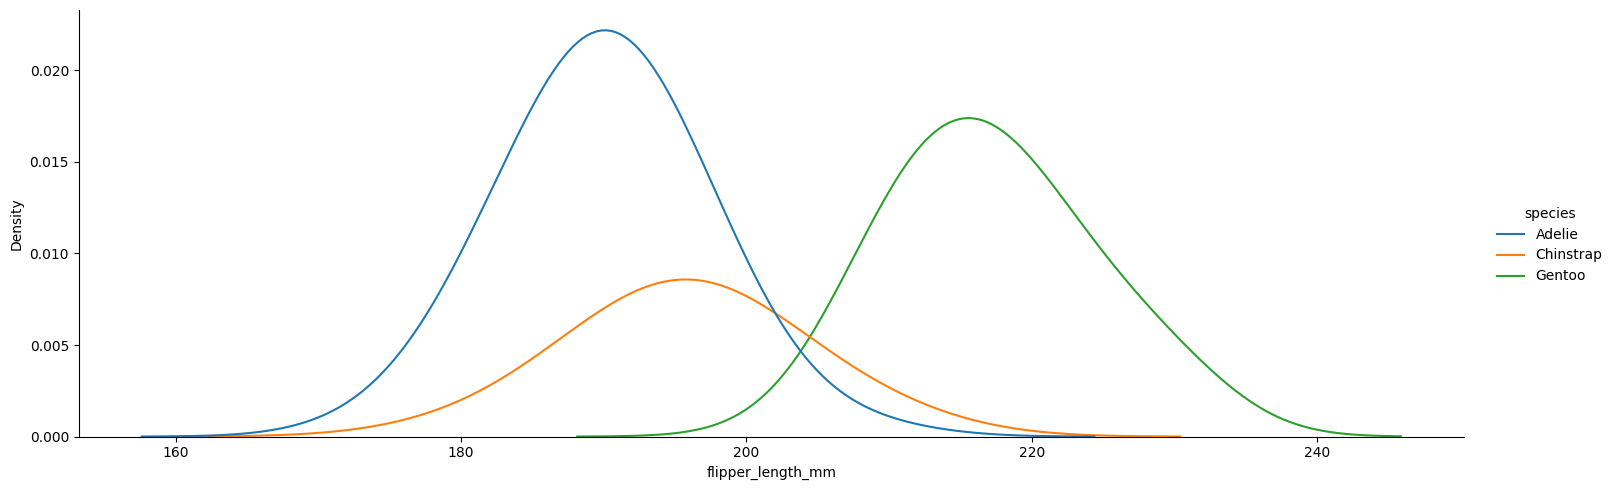

In [24]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde",aspect=3,bw_adjust=2)

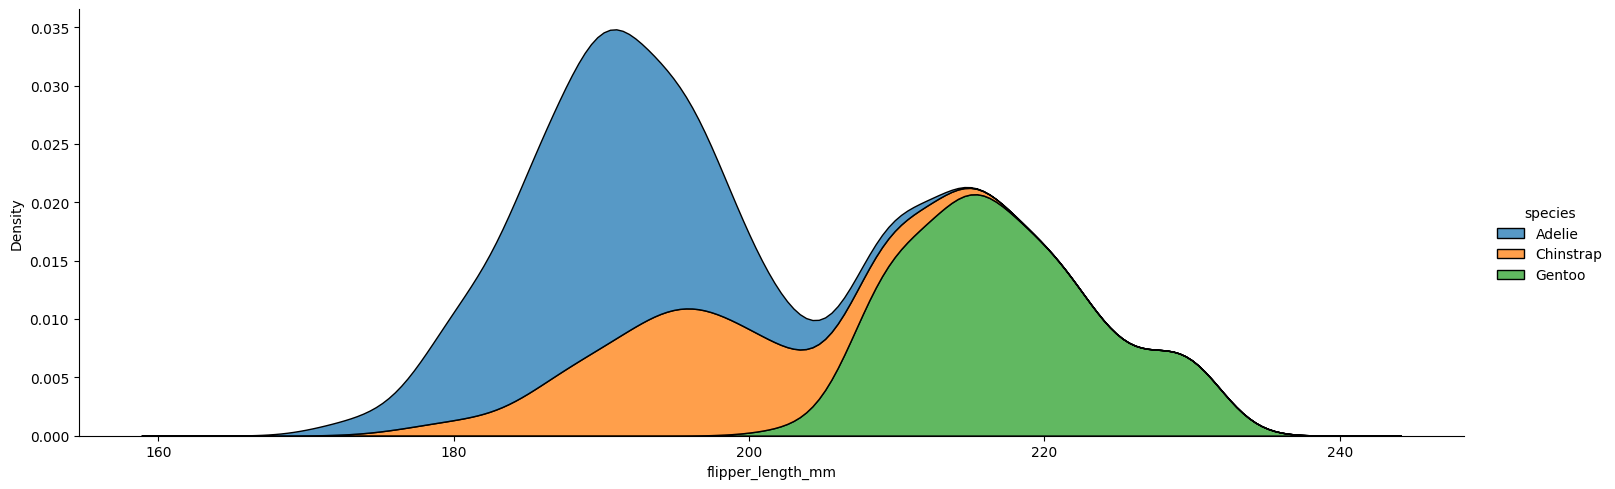

In [25]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack",aspect=3)

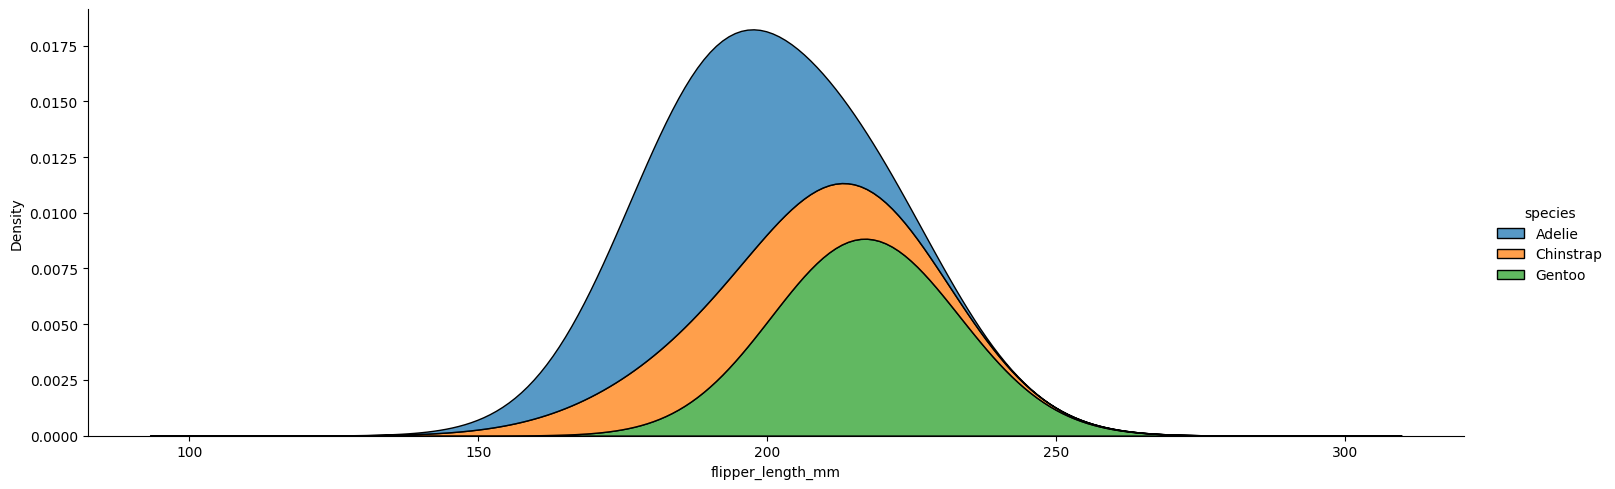

In [26]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack",aspect=3,bw_adjust=6)

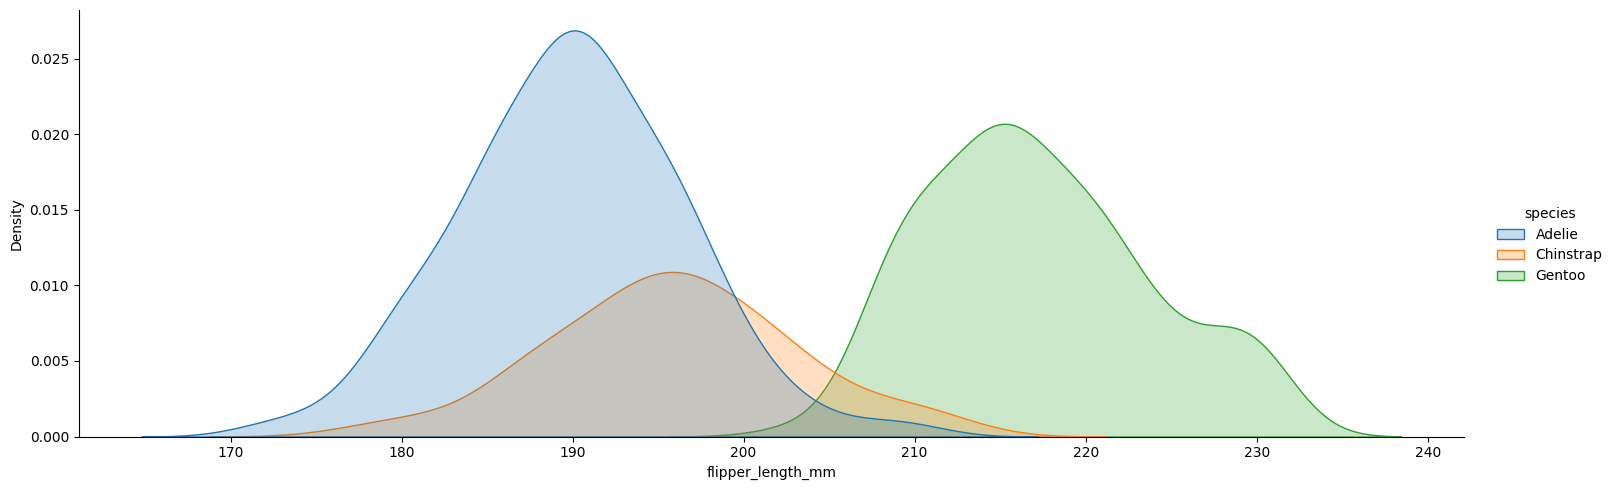

In [27]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True,aspect=3)

##### Kernel density estimation pitfalls

* KDE plots have many advantages
* Important features of the data are easy to discern `(central tendency, bimodality, skew)`, and they afford easy comparisons between subsets.
* But there are also situations where `KDE poorly` represents the `underlying data`.

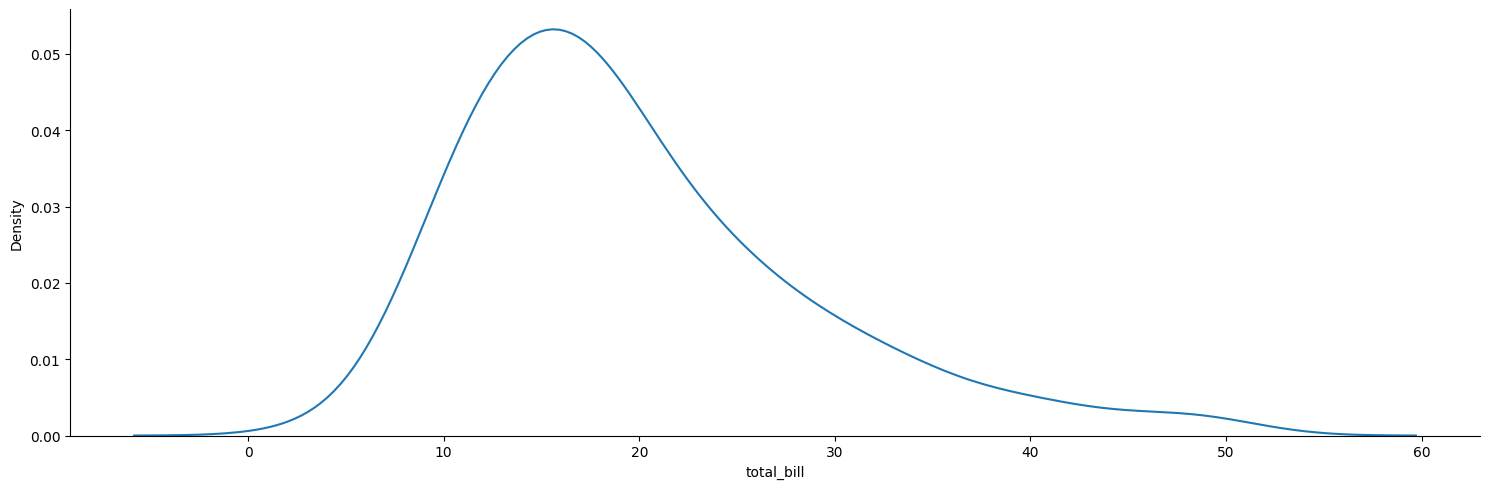

In [28]:
sns.displot(tips, x="total_bill", kind="kde",aspect=3)

* This is because the logic of KDE assumes that the `underlying distribution` is smooth and unbounded.

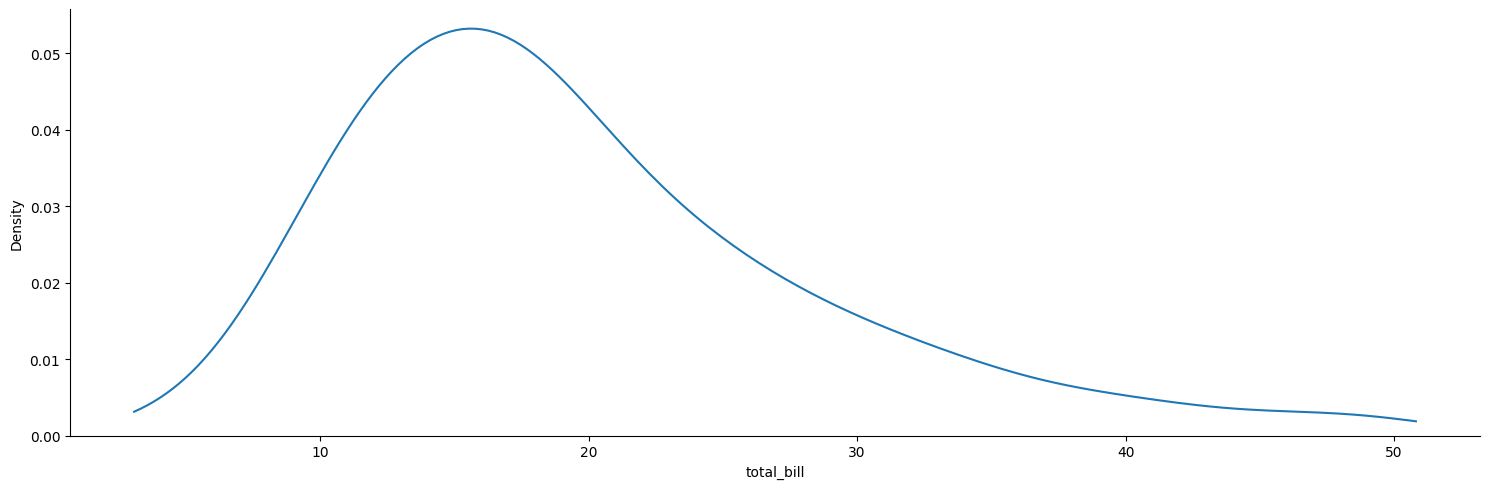

In [29]:
sns.displot(tips, x="total_bill", kind="kde", cut=0,aspect=3)

* The KDE approach also fails for discrete data or when data are naturally continuous but specific values are over-represented.
*  The important thing to keep in mind is that the KDE will always show you a smooth curve, even when the data themselves are not smooth. For example, consider this distribution of diamond weights:

In [30]:
diamonds = pd.read_csv("Datasets/diamonds.csv")
diamonds.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


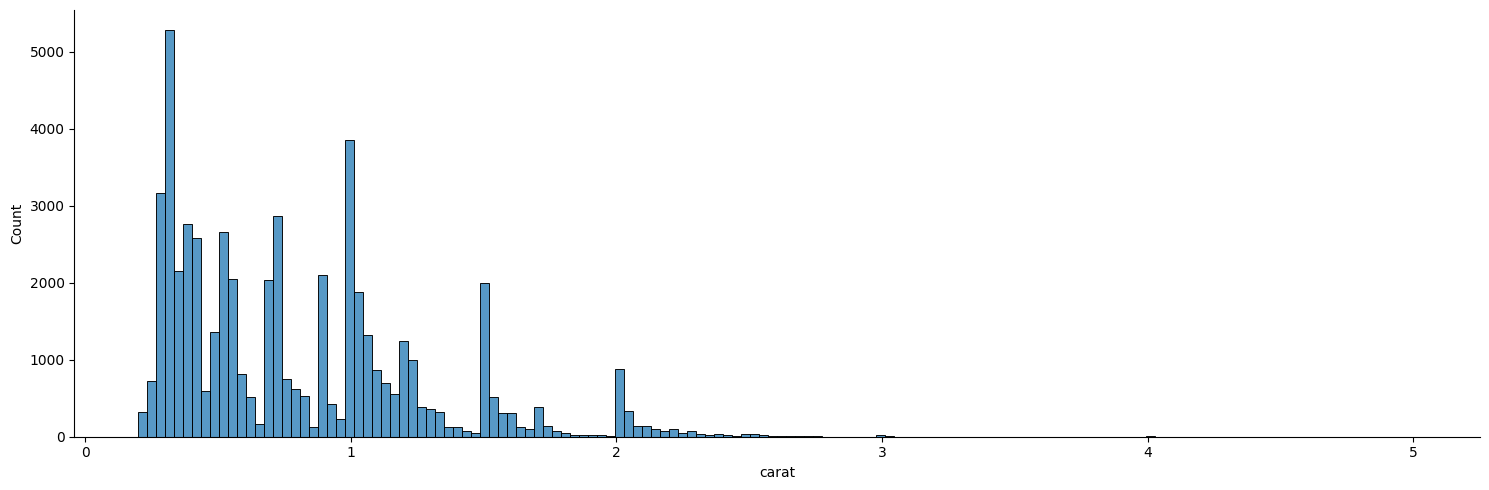

In [31]:
sns.displot(data=diamonds,x='carat',aspect=3)

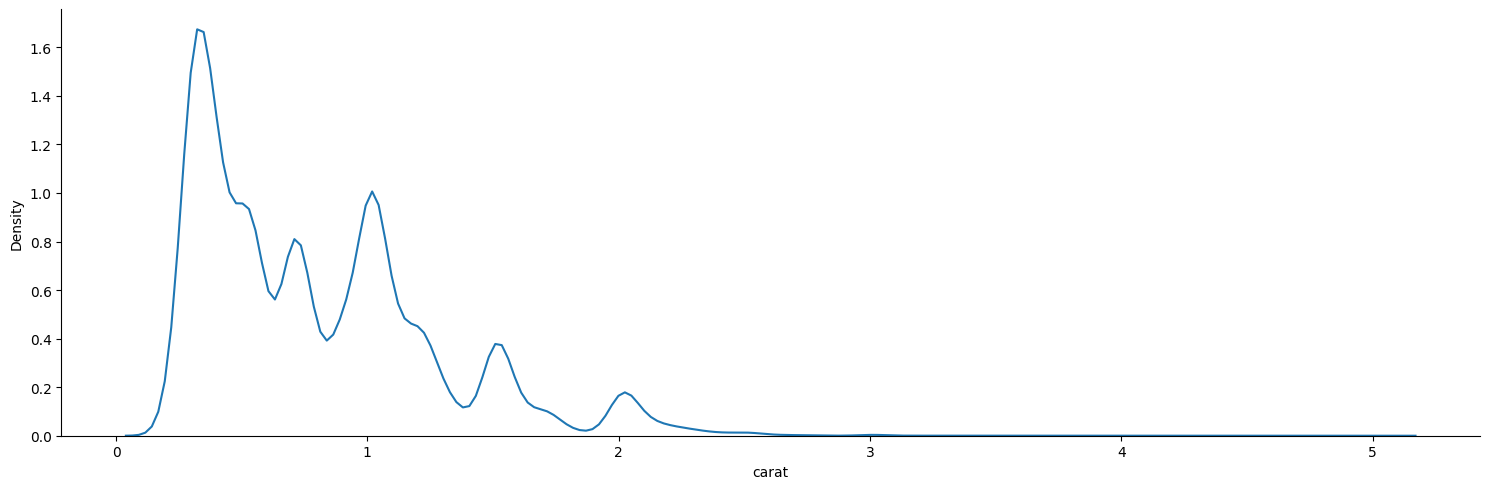

In [32]:
sns.displot(data=diamonds,x='carat',aspect=3,kind='kde')

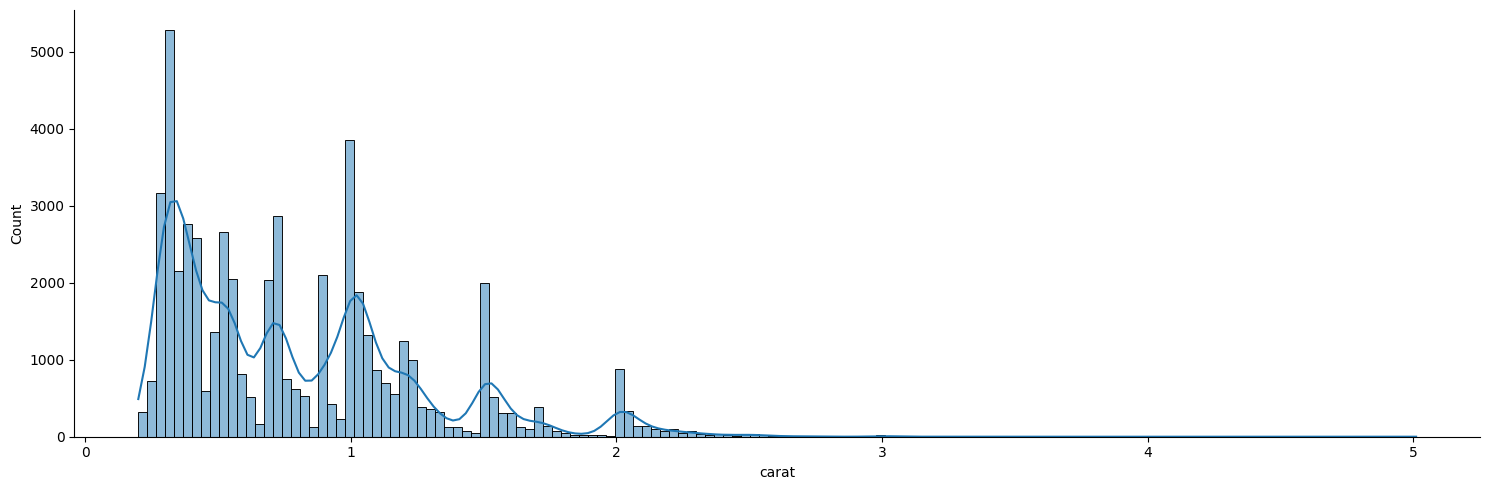

In [33]:
sns.displot(diamonds, x="carat", kde=True,aspect=3)

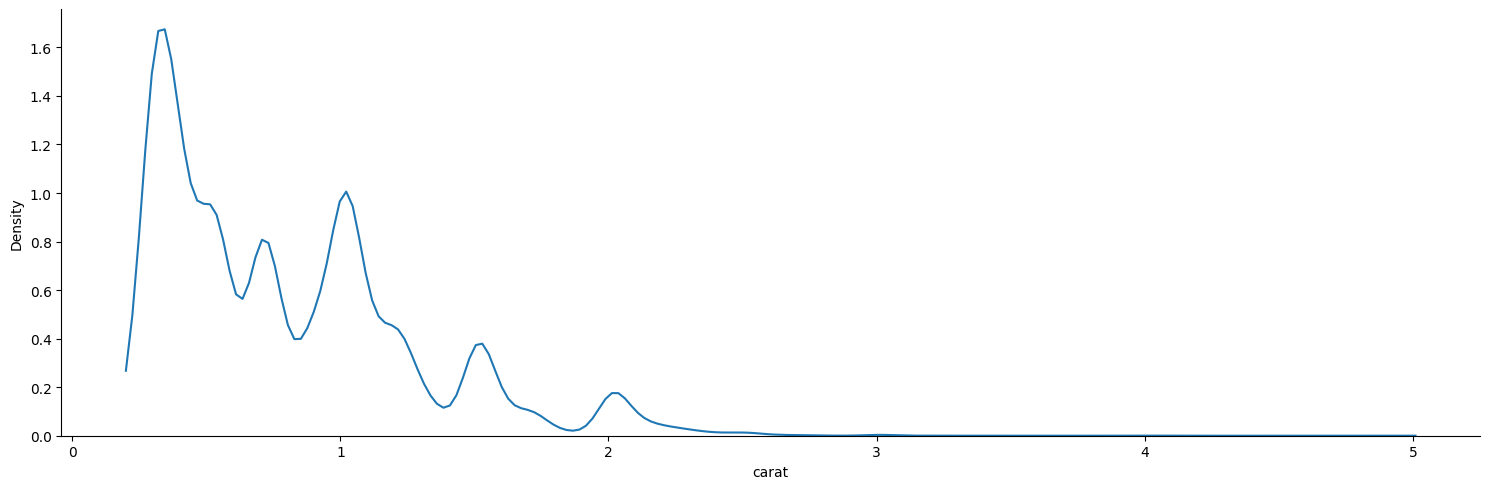

In [34]:
sns.displot(diamonds, x="carat",aspect=3,cut=0,kind='kde')

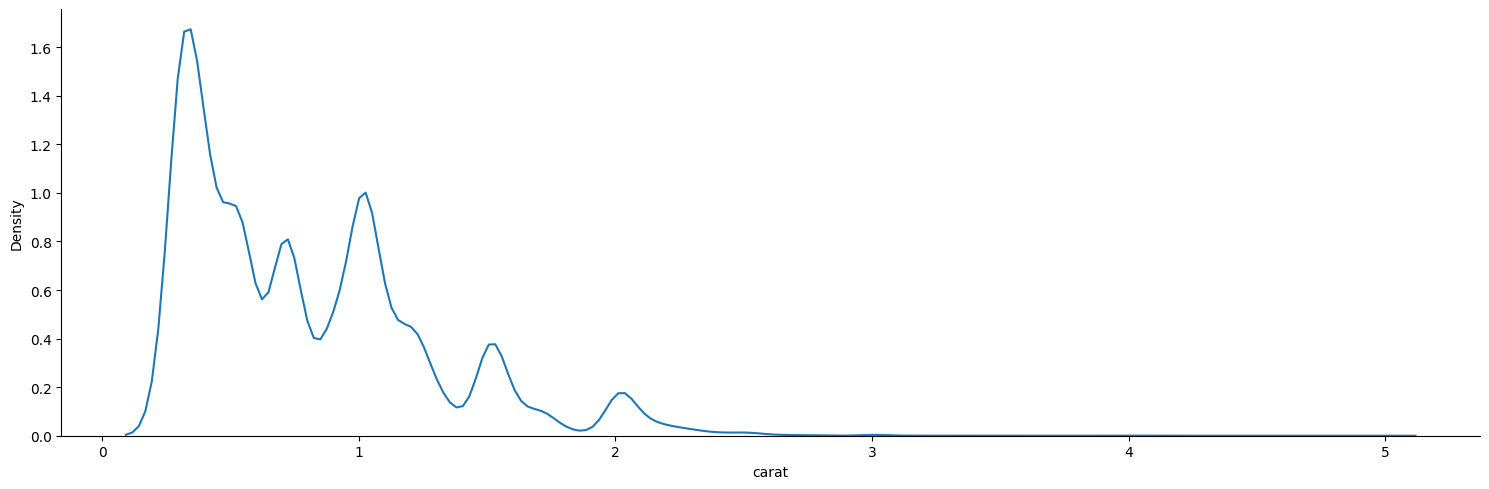

In [35]:
sns.displot(diamonds, x="carat",aspect=3,cut=2,kind='kde')

#### Empirical cumulative distributions

* A third option for visualizing distributions computes the `empirical cumulative distribution function` (ECDF).
* This plot draws a `monotonically-increasing curve` through each datapoint such that the height of the curve reflects the proportion of observations with a smaller value:

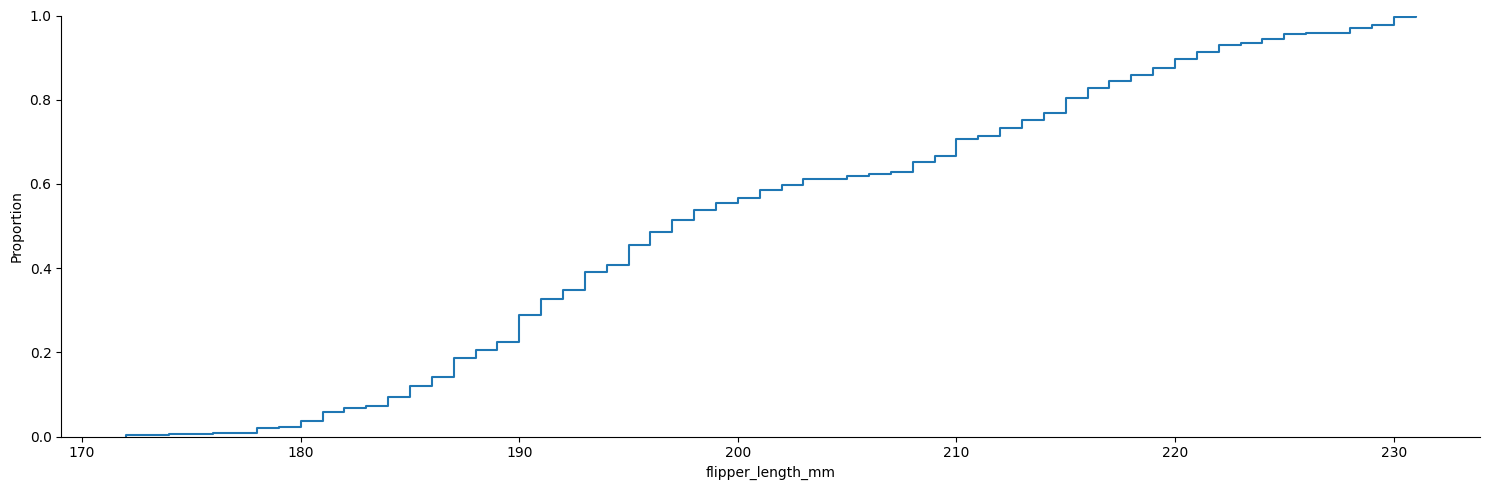

In [36]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf",aspect=3)

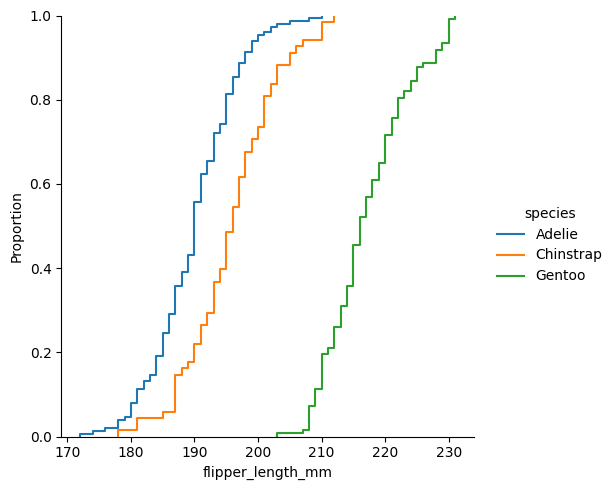

In [37]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

#### Visualizing bivariate distributions

* All of the examples so far have considered univariate distributions:
* distributions of a single variable, perhaps conditional on a second variable assigned to `hue`.
* Assigning a second variable to `y`, however, will plot a bivariate distribution:

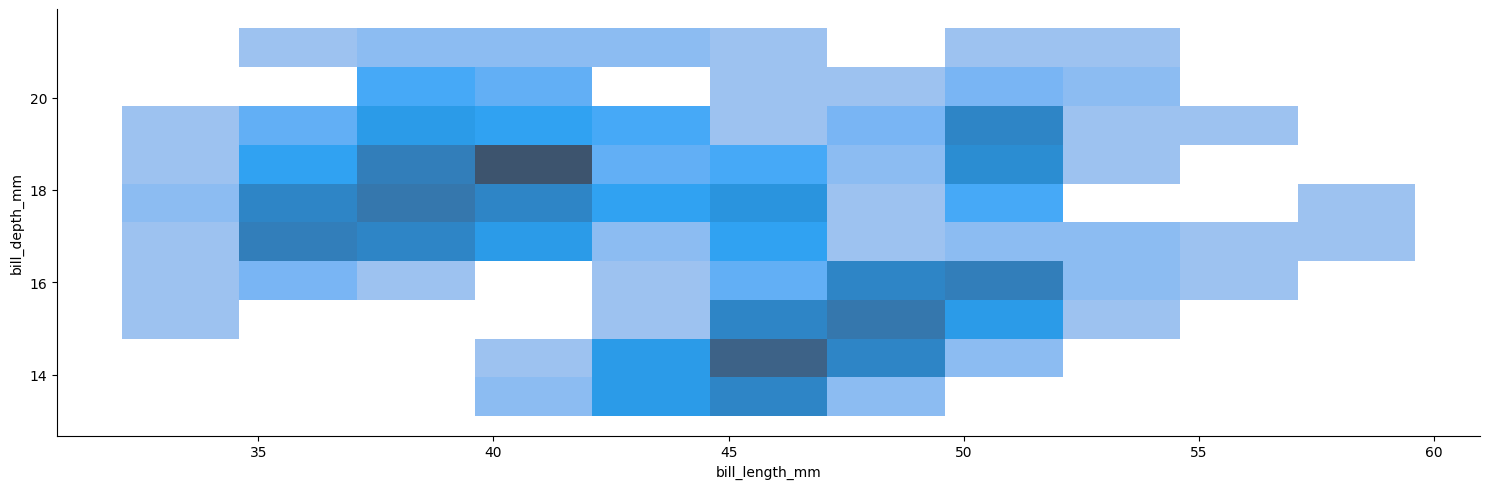

In [38]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3)

* a bivariate KDE plot smoothes the (x, y) observations with a 2D Gaussian.
* The default representation then shows the contours of the 2D density

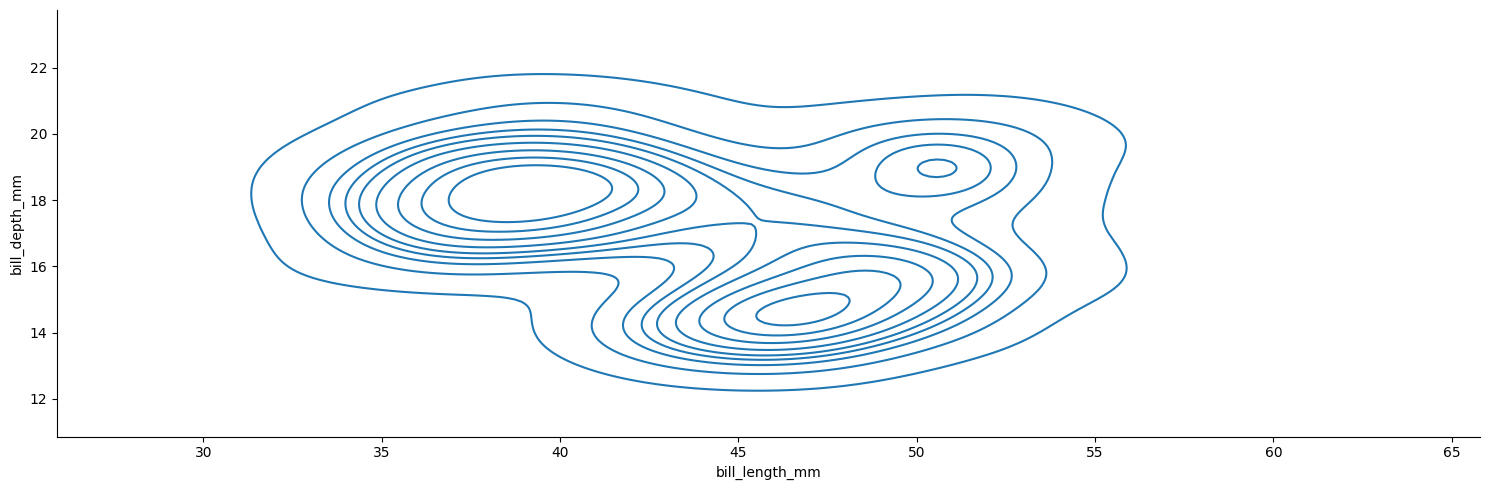

In [39]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3,kind='kde')

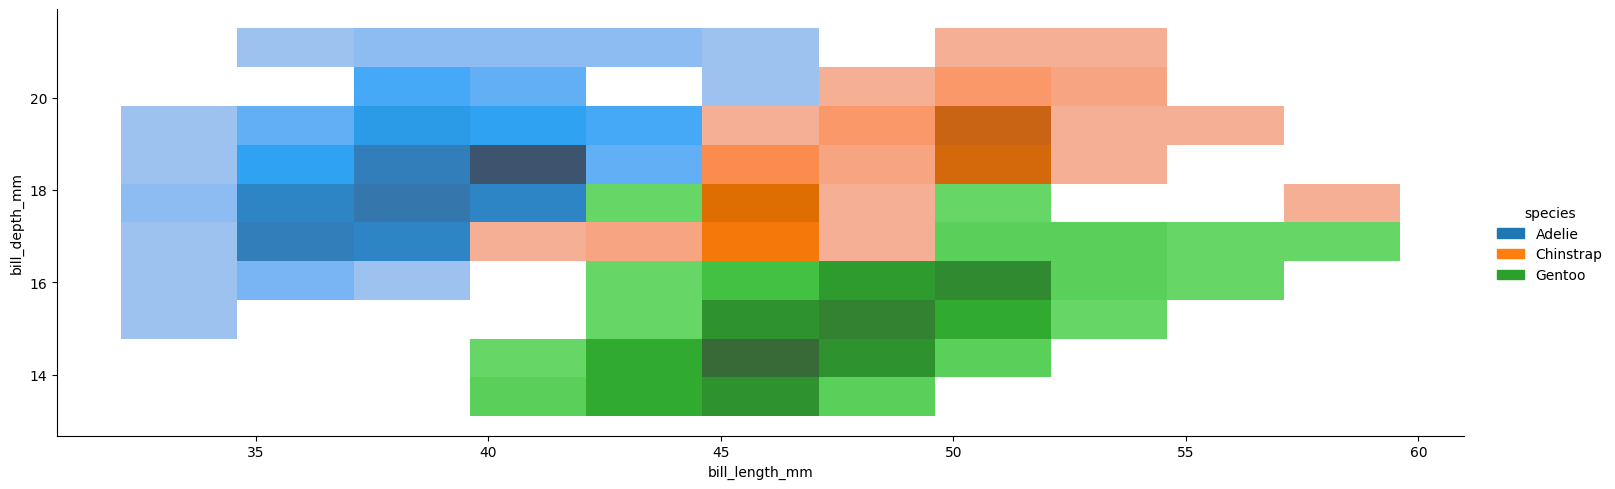

In [40]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3,hue='species')

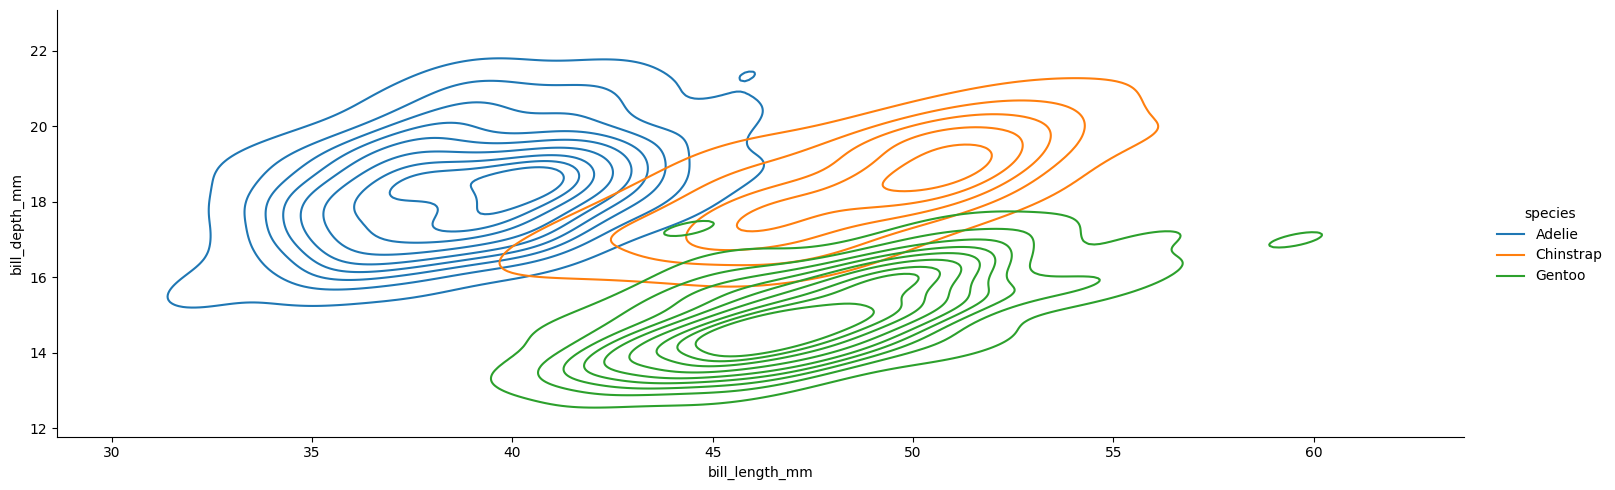

In [41]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3,hue='species',kind='kde')

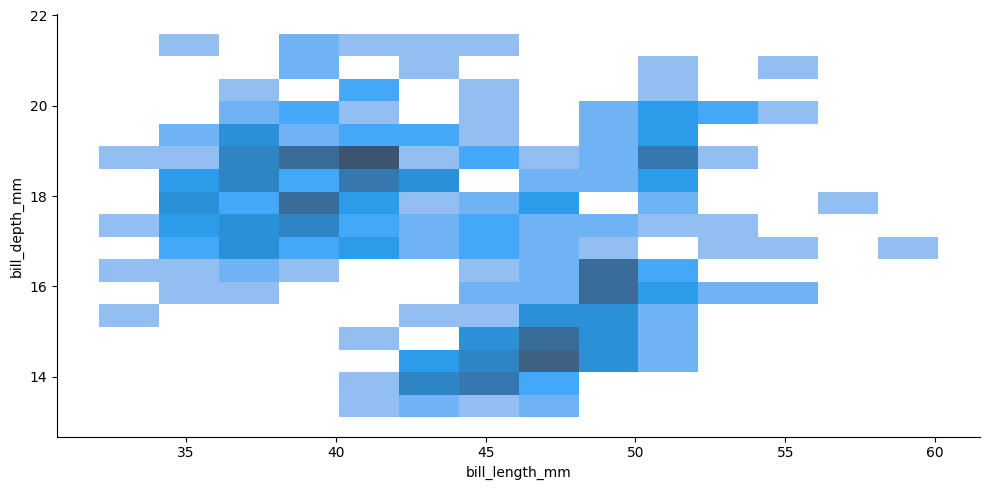

In [45]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5),aspect=2)

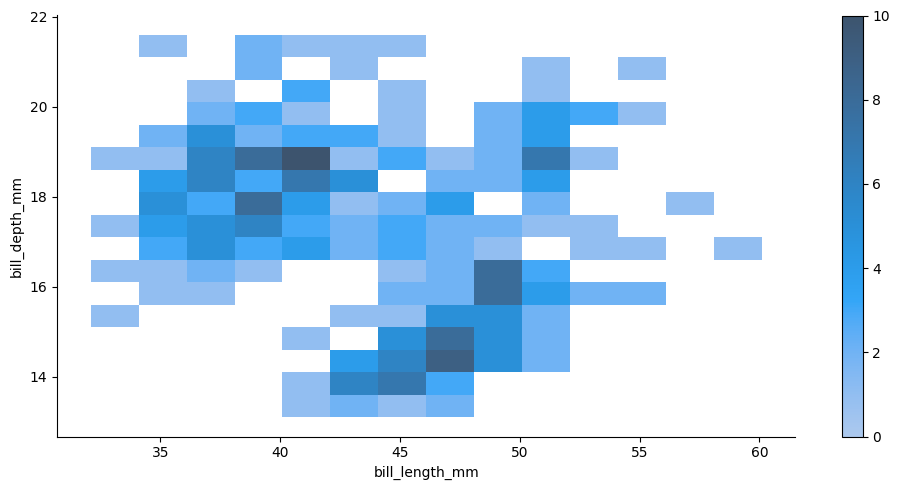

In [46]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5),aspect=2,cbar=True)

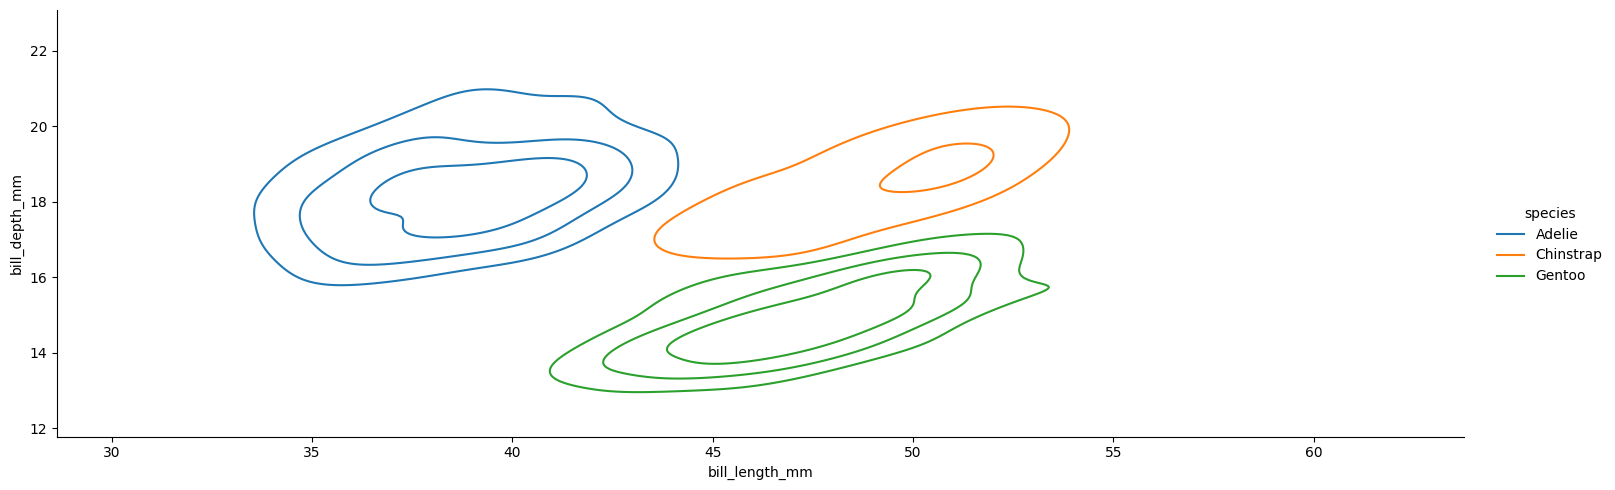

In [48]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3,hue='species',kind='kde',thresh=.2,levels=4)

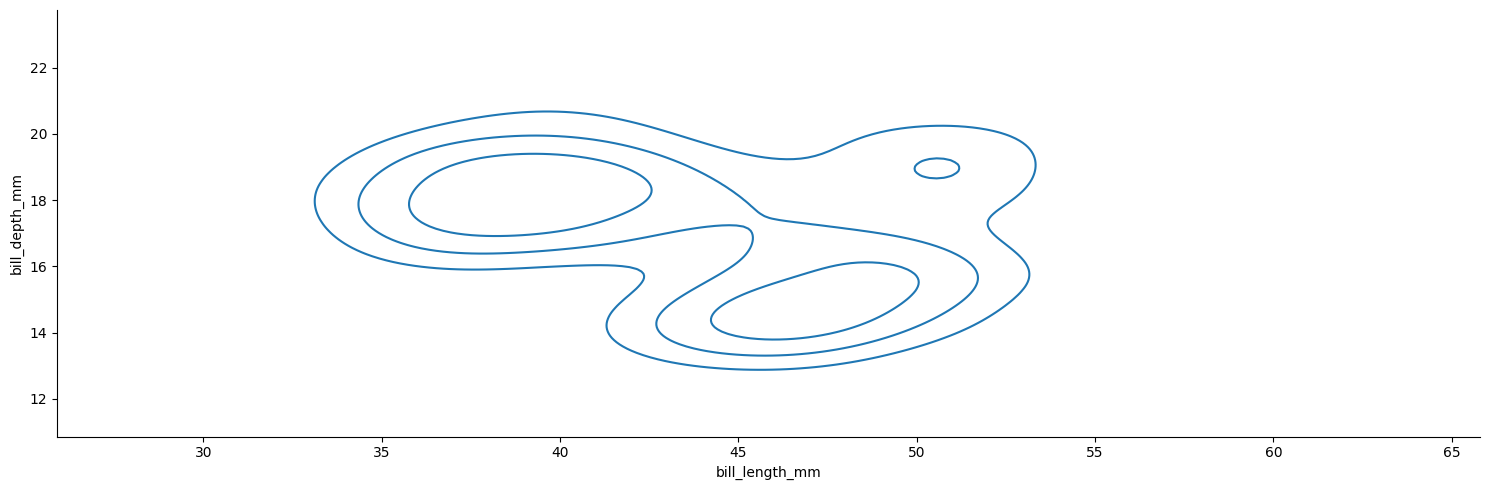

In [49]:
sns.displot(penguins,x='bill_length_mm',y="bill_depth_mm",aspect=3,kind='kde',thresh=.2,levels=4)

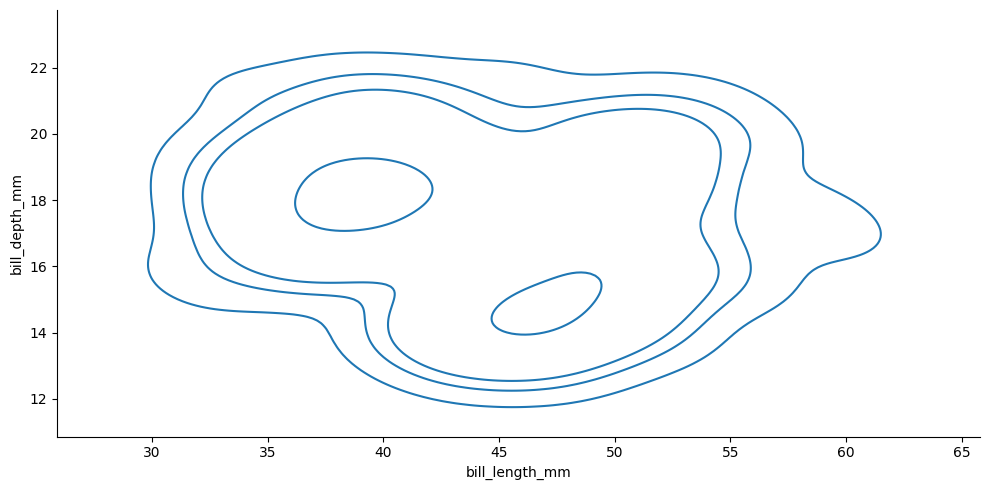

In [51]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8],aspect=2)

In [52]:
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


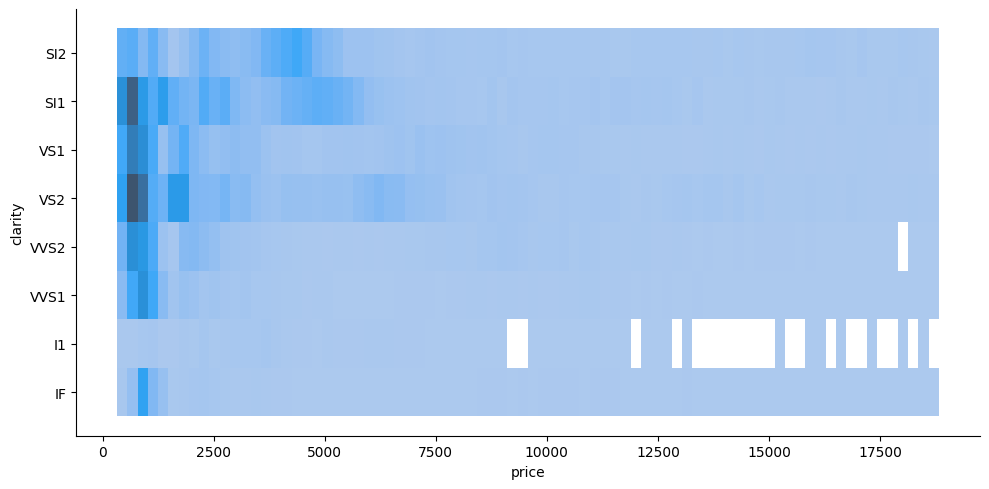

In [56]:
sns.displot(diamonds,x= 'price',y='clarity',aspect=2)

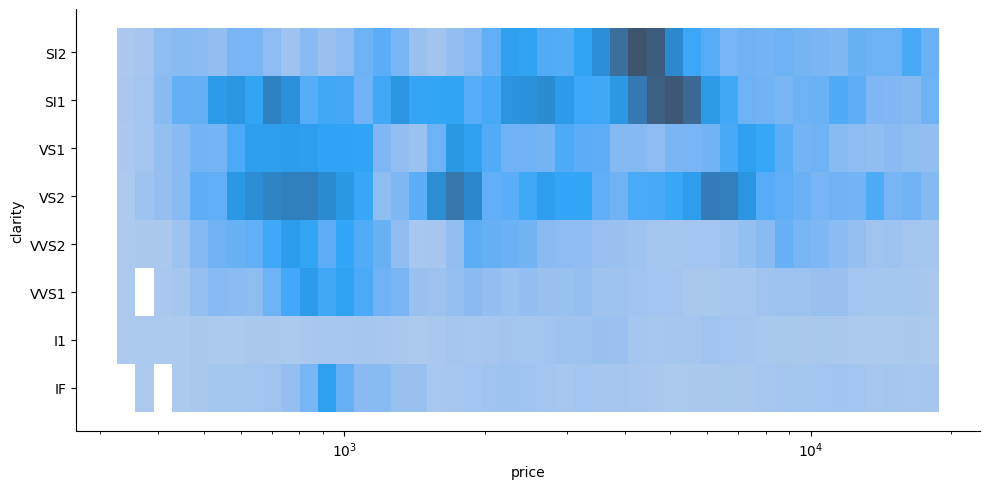

In [57]:
sns.displot(diamonds,x= 'price',y='clarity',aspect=2,log_scale=(True,False))

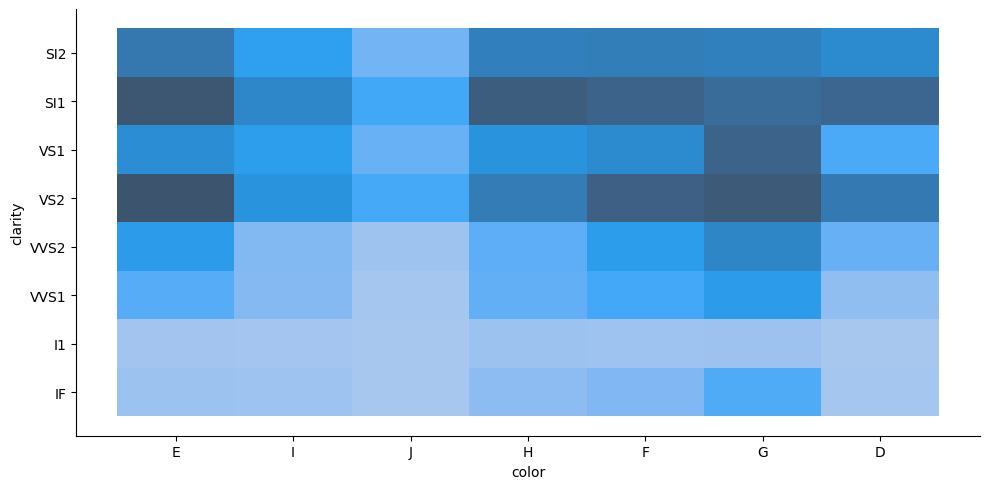

In [59]:
sns.displot(diamonds, x="color", y="clarity",aspect=2)

#### Distribution visualization in other settings

* Several other figure-level plotting functions in seaborn make use of the `histplot()` and `kdeplot()` functions.

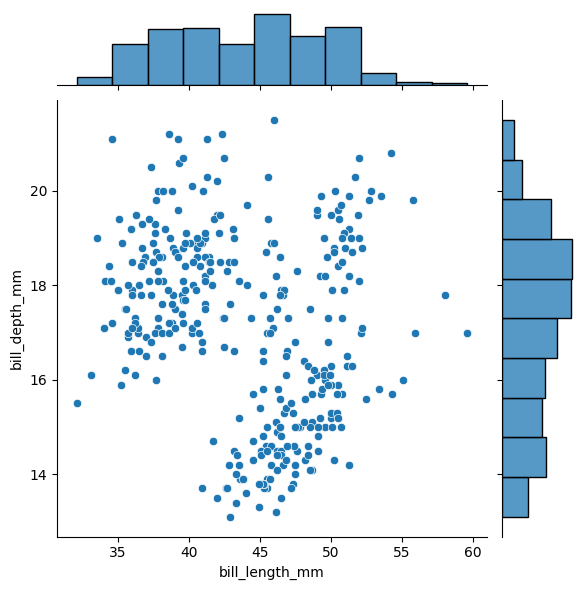

In [66]:
sns.jointplot(penguins,x='bill_length_mm',y="bill_depth_mm")

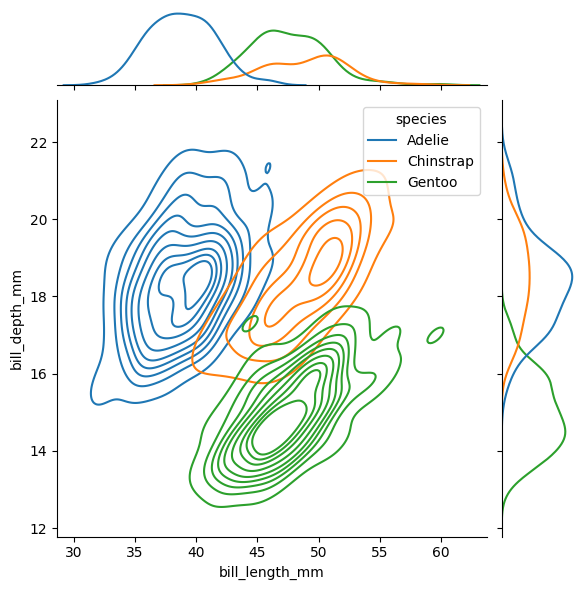

In [67]:
sns.jointplot(penguins,
              x='bill_length_mm',
              y="bill_depth_mm",
             hue='species',
             kind='kde')

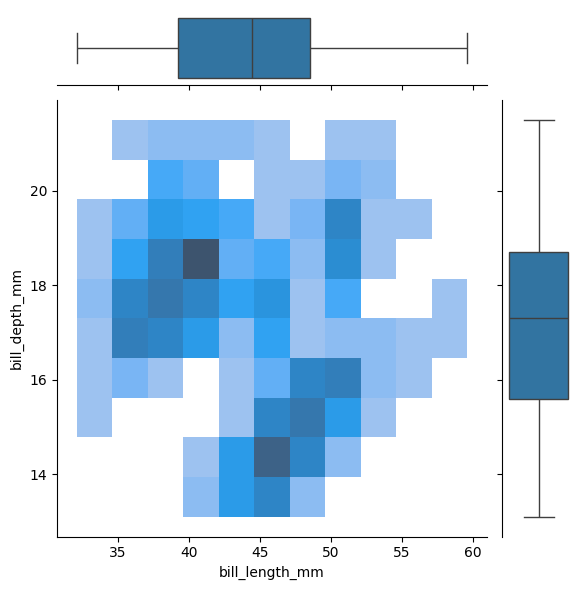

In [68]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

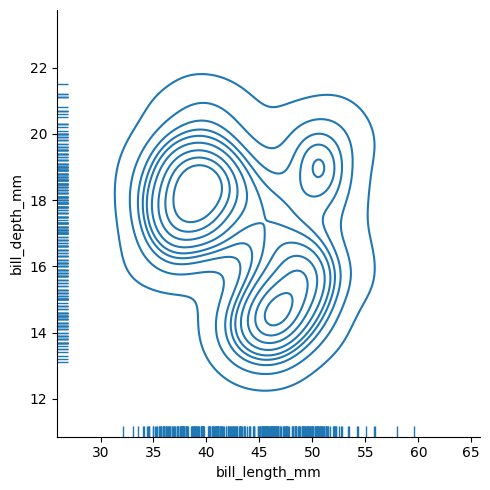

In [69]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", 
    rug=True
)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

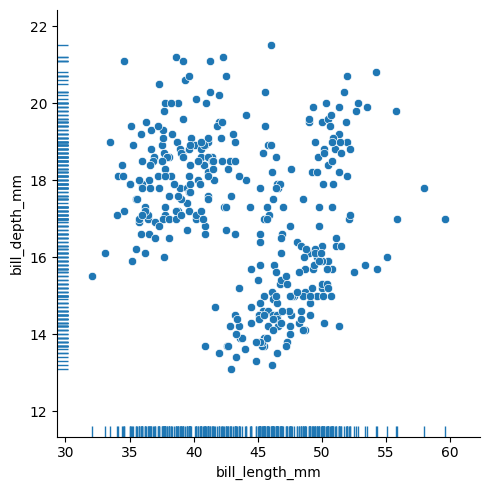

In [70]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

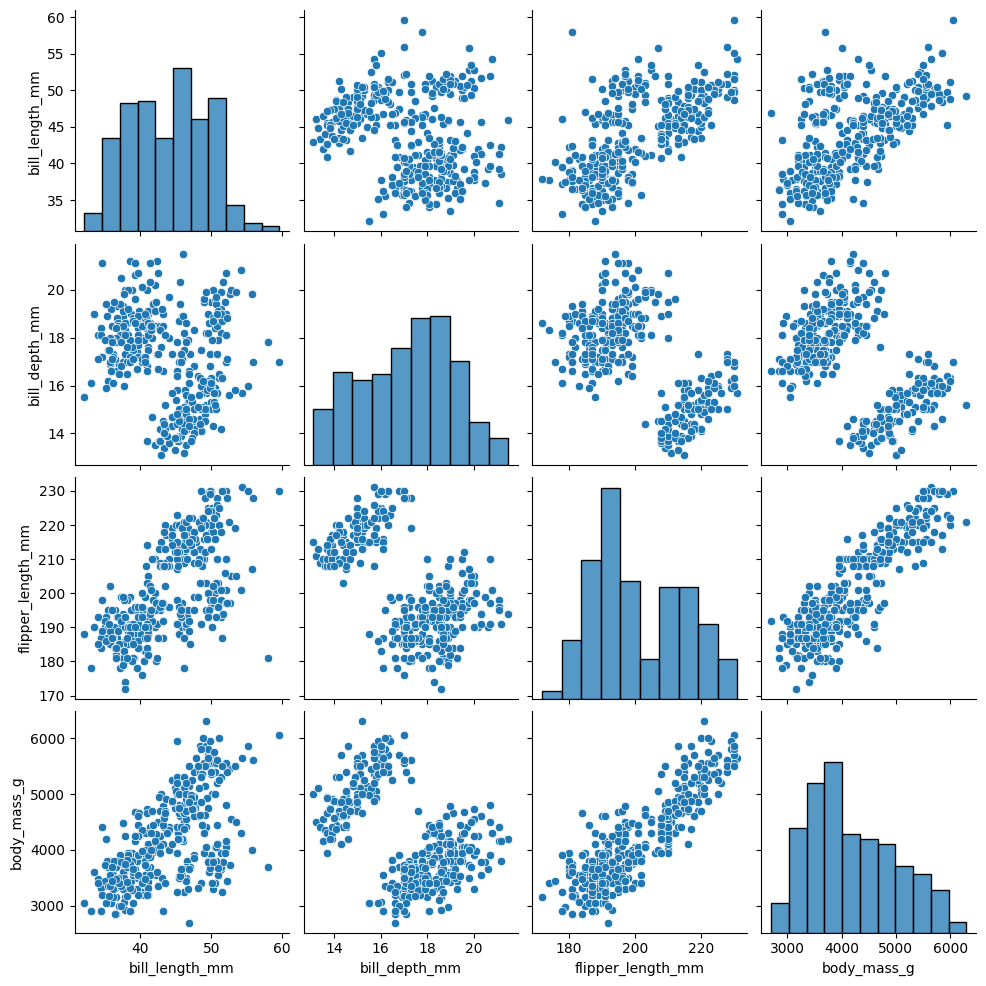

In [71]:
sns.pairplot(penguins)

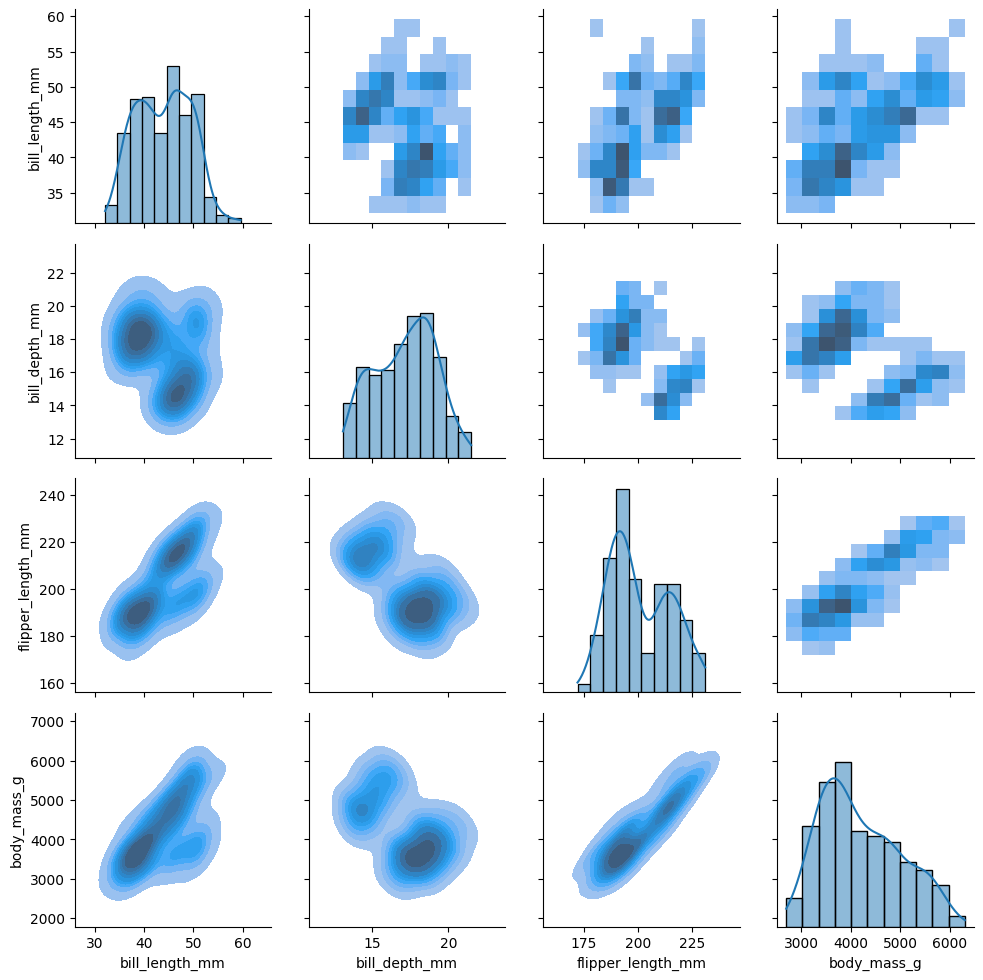

In [72]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)